# 1. 라이브러리 import 및 데이터 불러오기

In [1]:
# 필수 라이브러리 import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import os
import warnings

import tensorflow as tf
import keras
from keras import layers, Input, models
from keras.wrappers.scikit_learn import KerasClassifier 
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import train_test_split

import sys

np.set_printoptions(threshold=sys.maxsize)

In [2]:
df = pd.read_pickle('/content/drive/MyDrive/TNT/산업인공지능/실습/Task2/LSWMD.pkl')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 811457 entries, 0 to 811456
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   waferMap        811457 non-null  object 
 1   dieSize         811457 non-null  float64
 2   lotName         811457 non-null  object 
 3   waferIndex      811457 non-null  float64
 4   trianTestLabel  811457 non-null  object 
 5   failureType     811457 non-null  object 
dtypes: float64(2), object(4)
memory usage: 37.1+ MB


# 2. EDA

In [3]:
df.info()

# waferMap : waferMap
# die size : chip의 wafer상에서 면적  # die : chip
# lotName : lot - 제조단위가 동일한 조건 아래에서 만들어진 균일한 특성 및 품질을 갖는 제품군, wafer는 lot 단위로 제조되며 일반적으로 lot당 최대 25개의 wafer 제조
# waferIndex : 하나의 lot에서 각 wafer에 붙는 번호
# trianTestLabel : The training / test set were already split by domain experts
# failureType : 결함 타입

# 데이터 개수 : 811457
# object 타입 : waferMap, lotName, trianTestLabel, failureType

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 811457 entries, 0 to 811456
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   waferMap        811457 non-null  object 
 1   dieSize         811457 non-null  float64
 2   lotName         811457 non-null  object 
 3   waferIndex      811457 non-null  float64
 4   trianTestLabel  811457 non-null  object 
 5   failureType     811457 non-null  object 
dtypes: float64(2), object(4)
memory usage: 37.1+ MB


In [4]:
# trianTestLabel 이름 변경
df.rename(columns = {'trianTestLabel':'trainTestLabel'}, inplace = 'True')
df.columns

Index(['waferMap', 'dieSize', 'lotName', 'waferIndex', 'trainTestLabel',
       'failureType'],
      dtype='object')

In [5]:
df.head(26)

waferMap  ...  failureType
0   [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  ...     [[none]]
1   [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  ...     [[none]]
2   [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  ...     [[none]]
3   [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  ...     [[none]]
4   [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  ...     [[none]]
5   [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  ...     [[none]]
6   [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  ...     [[none]]
7   [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  ...     [[none]]
8   [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  ...     [[none]]
9   [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  ...     [[none]]
10  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  ...     [[none]]
11  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  ...     [[none]]
12  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  ...     [[none]]
13  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  ...     [[none]]
14  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  ...     [[none]]
15  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  ...     [[none]]
16  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  ...     [[none]]
17  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  ...     [[none]]
18  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  ...     [[none]]
19  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  ...      [[Loc]]
20  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  ...     [[none]]
21  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  ...     [[none]]
22  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  ...     [[none]]
23  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  ...     [[none]]
24  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  ...     [[none]]
25  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  ...     [[none]]

[26 rows x 6 columns]

In [6]:
df.tail()

# trainTestLabel, failureType 결측치 존재

waferMap  ...    failureType
811452  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...  ...  [[Edge-Ring]]
811453  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1,...  ...   [[Edge-Loc]]
811454  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...  ...  [[Edge-Ring]]
811455  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,...  ...             []
811456  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...  ...             []

[5 rows x 6 columns]

## 1) 데이터 정리

In [7]:
df['trainTestLabel'][0]

array([['Training']], dtype='<U8')

In [8]:
df['trainTestLabel'][0].shape

(1, 1)

In [9]:
df['trainTestLabel'][811455]

array([], shape=(0, 0), dtype=float64)

In [10]:
# trainTestLabel, failureType [] 제거하는 함수
def extract(x):
  if x.shape == (1, 1):
    return x[0][0]
  
  else:
    return None

In [11]:
# trainTestLabel, failureType [] 제거
df['trainTestLabel'] = df['trainTestLabel'].apply(lambda x: extract(x))
df['failureType'] = df['failureType'].apply(lambda x: extract(x))

In [12]:
df.head()

waferMap  ...  failureType
0  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  ...         none
1  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  ...         none
2  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  ...         none
3  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  ...         none
4  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  ...         none

[5 rows x 6 columns]

In [13]:
df.tail()

waferMap  ...  failureType
811452  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...  ...    Edge-Ring
811453  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1,...  ...     Edge-Loc
811454  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...  ...    Edge-Ring
811455  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,...  ...         None
811456  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...  ...         None

[5 rows x 6 columns]

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 811457 entries, 0 to 811456
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   waferMap        811457 non-null  object 
 1   dieSize         811457 non-null  float64
 2   lotName         811457 non-null  object 
 3   waferIndex      811457 non-null  float64
 4   trainTestLabel  172950 non-null  object 
 5   failureType     172950 non-null  object 
dtypes: float64(2), object(4)
memory usage: 37.1+ MB


In [15]:
# null 제거
df2 = df.dropna(axis = 0)

In [16]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172950 entries, 0 to 811454
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   waferMap        172950 non-null  object 
 1   dieSize         172950 non-null  float64
 2   lotName         172950 non-null  object 
 3   waferIndex      172950 non-null  float64
 4   trainTestLabel  172950 non-null  object 
 5   failureType     172950 non-null  object 
dtypes: float64(2), object(4)
memory usage: 9.2+ MB


In [17]:
df2.tail()

waferMap  ...  failureType
811450  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2,...  ...     Edge-Loc
811451  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,...  ...     Edge-Loc
811452  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...  ...    Edge-Ring
811453  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1,...  ...     Edge-Loc
811454  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...  ...    Edge-Ring

[5 rows x 6 columns]

## 2) 데이터 확인

### (1) 범주형 데이터 ['lotName', 'waferIndex', 'trainTestLabel', 'failureType']

In [18]:
# unique 값 확인하는 함수
def unique(x):
  print("--------< ", x.name, " >--------")
  print("unique : ", x.unique())
  print("num of unique : ", x.unique().shape[0], "\n")
  print(x.value_counts(), "\n\n")

# unique 값 확인
categorical_cols = ['lotName', 'waferIndex', 'trainTestLabel', 'failureType'] # 범주형 데이터
df2[categorical_cols].apply(lambda x: unique(x))


# lotName, waferIndex : one-hot encoding을 해서 넣을 만큼 중요한 데이터는 아닌 듯
# trainTestLabel : Test > train이기 때문에 무시하고 다시 train_test_split 하는게 좋을 듯

--------<  lotName  >--------
unique :  ['lot1' 'lot2' 'lot3' 'lot4' 'lot5' 'lot6' 'lot7' 'lot8' 'lot9' 'lot10'
 'lot11' 'lot12' 'lot13' 'lot14' 'lot15' 'lot16' 'lot17' 'lot18' 'lot19'
 'lot20' 'lot21' 'lot22' 'lot23' 'lot24' 'lot25' 'lot26' 'lot27' 'lot28'
 'lot29' 'lot30' 'lot31' 'lot32' 'lot33' 'lot34' 'lot35' 'lot36' 'lot37'
 'lot38' 'lot39' 'lot40' 'lot41' 'lot42' 'lot43' 'lot44' 'lot45' 'lot46'
 'lot47' 'lot48' 'lot49' 'lot50' 'lot51' 'lot52' 'lot53' 'lot54' 'lot55'
 'lot56' 'lot57' 'lot58' 'lot59' 'lot60' 'lot61' 'lot62' 'lot63' 'lot64'
 'lot65' 'lot66' 'lot67' 'lot68' 'lot69' 'lot70' 'lot71' 'lot72' 'lot74'
 'lot75' 'lot76' 'lot77' 'lot78' 'lot79' 'lot80' 'lot81' 'lot82' 'lot83'
 'lot84' 'lot85' 'lot86' 'lot87' 'lot88' 'lot89' 'lot90' 'lot91' 'lot92'
 'lot93' 'lot94' 'lot95' 'lot96' 'lot97' 'lot98' 'lot99' 'lot100' 'lot101'
 'lot102' 'lot103' 'lot104' 'lot105' 'lot106' 'lot107' 'lot108' 'lot109'
 'lot110' 'lot111' 'lot112' 'lot113' 'lot114' 'lot115' 'lot116' 'lot117'
 'lot118' 

lotName           None
waferIndex        None
trainTestLabel    None
failureType       None
dtype: object

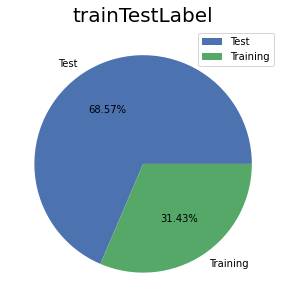

In [19]:
# pie chart : trainTestLabel

plt.rcParams['figure.figsize'] = (5,5)
labels = df2['trainTestLabel'].value_counts().index
size = df2['trainTestLabel'].value_counts()

plt.style.use('seaborn-deep')
plt.pie(size, labels = labels, autopct = "%.2f%%")
plt.axis('off')
plt.title('trainTestLabel', fontsize = 20)
plt.legend()
plt.show()

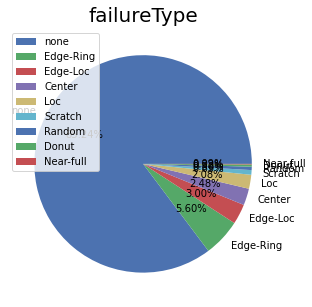

In [20]:
# pie chart : failureType

plt.rcParams['figure.figsize'] = (5,5)
labels = df2['failureType'].value_counts().index
size = df2['failureType'].value_counts()

plt.style.use('seaborn-deep')
plt.pie(size, labels = labels, autopct = "%.2f%%")
plt.axis('off')
plt.title('failureType', fontsize = 20)
plt.legend()
plt.show()

In [21]:
labels

Index(['none', 'Edge-Ring', 'Edge-Loc', 'Center', 'Loc', 'Scratch', 'Random',
       'Donut', 'Near-full'],
      dtype='object')

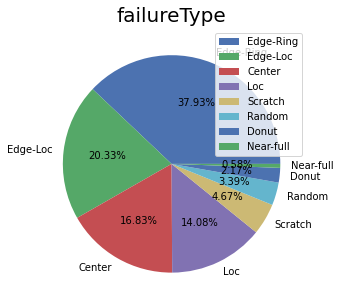

In [22]:
# pie chart : failureType  # none 제외

plt.rcParams['figure.figsize'] = (5,5)

plt.style.use('seaborn-deep')
plt.pie(size.drop('none'), labels = np.delete(labels, 0), autopct = "%.2f%%")
plt.axis('off')
plt.title('failureType', fontsize = 20)
plt.legend()
plt.show()

### (2) 이미지 데이터 ['waferMap']

In [23]:
df2['waferMap'][0].shape

(45, 48)

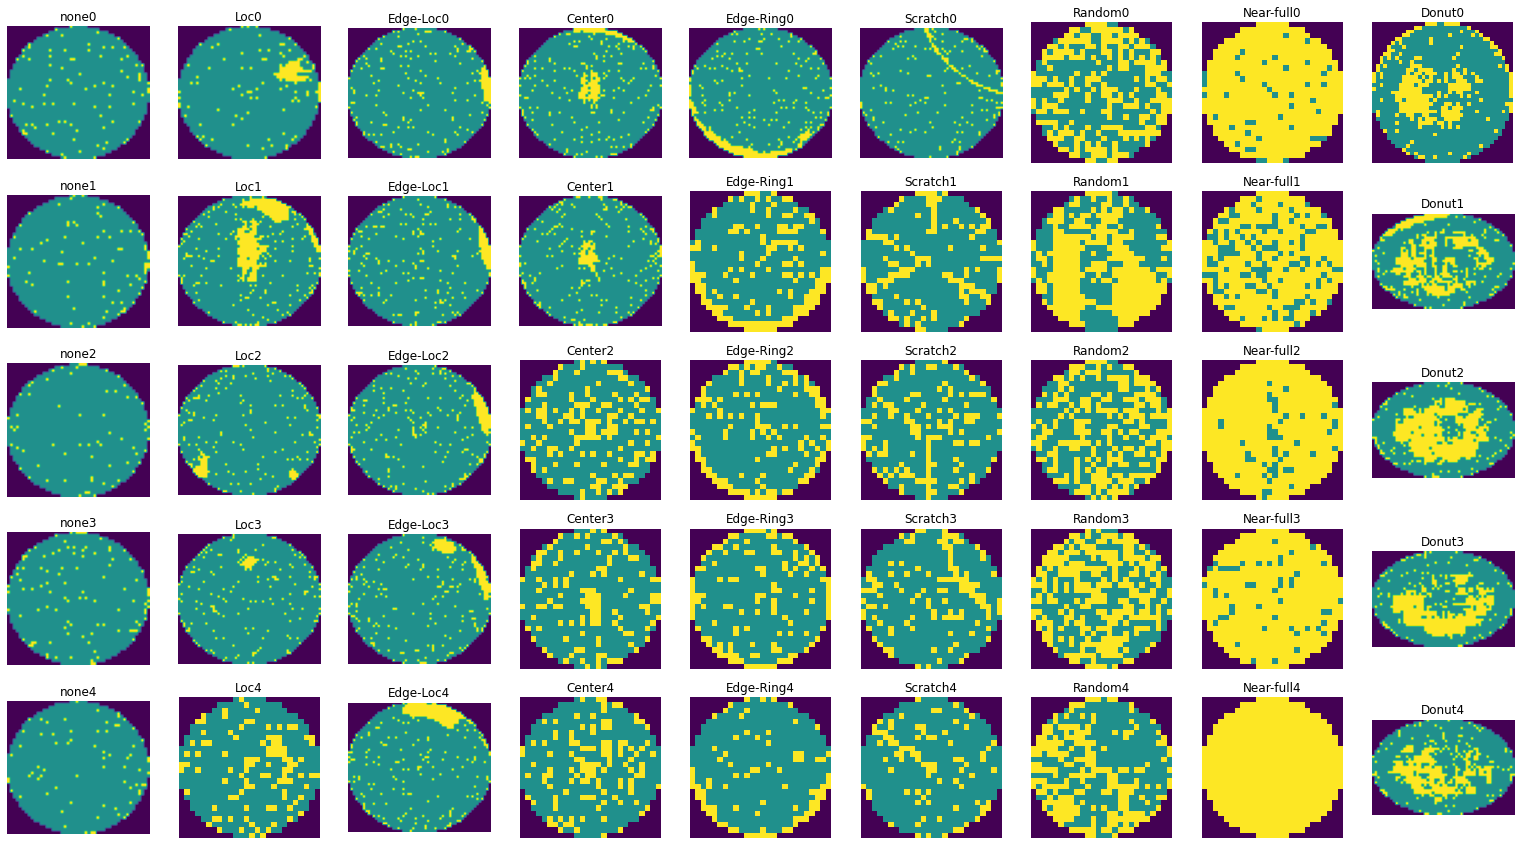

In [24]:
# 시각화

failureType_cols = df2['failureType'].unique()

rows = 5
cols = len(failureType_cols)
n = rows*cols
fig, axes = plt.subplots(rows, cols, figsize=(cols*3, rows*3))

for col in range(cols):
  for row, wafermap in enumerate(df2[df2['failureType'] == failureType_cols[col]]['waferMap'][:rows]):
    r = row
    c = col
    ax = axes[r][c]
    ax.imshow(wafermap)
    ax.set_title(failureType_cols[col] + str(row))
    ax.axis('off')

plt.show()

# 이미지 크기가 다른가?

In [25]:
# 이미지 크기 확인

df2['waferMap'].apply(lambda x: x.shape).unique()

array([(45, 48), (53, 58), (26, 26), (70, 58), (60, 40), (37, 37),
       (37, 55), (41, 57), (39, 39), (62, 75), (50, 43), (43, 43),
       (36, 34), (42, 43), (75, 63), (32, 36), (102, 66), (54, 71),
       (29, 29), (38, 45), (41, 41), (118, 84), (54, 42), (42, 29),
       (49, 39), (35, 38), (41, 56), (43, 42), (26, 25), (30, 30),
       (33, 29), (34, 34), (52, 55), (35, 31), (30, 34), (50, 39),
       (33, 33), (32, 29), (63, 62), (34, 35), (39, 31), (38, 36),
       (69, 73), (25, 27), (113, 71), (26, 30), (29, 30), (40, 40),
       (87, 89), (70, 36), (56, 41), (89, 76), (52, 59), (33, 24),
       (36, 36), (45, 46), (76, 64), (87, 74), (53, 54), (42, 61),
       (114, 90), (44, 44), (35, 36), (64, 71), (31, 28), (75, 75),
       (137, 116), (39, 37), (30, 31), (47, 42), (27, 30), (45, 45),
       (51, 30), (72, 43), (59, 55), (58, 59), (62, 76), (29, 45),
       (31, 31), (48, 49), (63, 59), (89, 90), (41, 39), (76, 71),
       (73, 67), (40, 42), (71, 63), (22, 35), (36, 41),

In [26]:
df2['waferMap'].apply(lambda x: x.shape).value_counts()

# 이미지 사이즈 조절이 필요하다

(25, 27)     18781
(26, 26)     14366
(30, 34)     12400
(29, 26)     11751
(27, 25)     10682
             ...  
(27, 15)         1
(58, 54)         1
(71, 70)         1
(53, 44)         1
(43, 133)        1
Name: waferMap, Length: 346, dtype: int64

### (3) 수치형 데이터 ['dieSize']

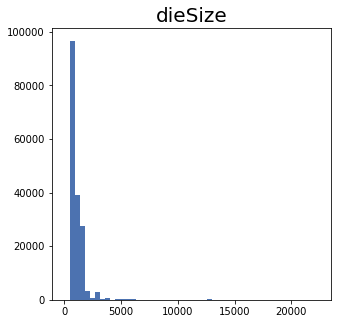

In [27]:
plt.hist(df2['dieSize'], bins = 50)
plt.title('dieSize', fontsize = 20)
plt.show()

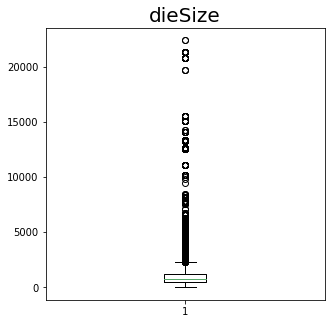

In [28]:
plt.boxplot(df2['dieSize'])
plt.title('dieSize', fontsize = 20)
plt.show()

# 이상치 존재

# 3. 전처리

In [29]:
# 필요없는 데이터 drop

df_new = df2.drop(labels = ['lotName', 'waferIndex', 'trainTestLabel'], axis = 1)

In [30]:
del df
del df2

In [31]:
def find_dim(x):
    return x.shape

df_new['waferMapDim'] = df_new.waferMap.apply(find_dim)
df_new.sample(5)

waferMap  ...  waferMapDim
805038  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,...  ...     (41, 33)
715100  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  ...     (41, 41)
695679  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  ...     (62, 64)
752203  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 1,...  ...     (27, 25)
731965  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2,...  ...     (33, 29)

[5 rows x 4 columns]

In [32]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172950 entries, 0 to 811454
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   waferMap     172950 non-null  object 
 1   dieSize      172950 non-null  float64
 2   failureType  172950 non-null  object 
 3   waferMapDim  172950 non-null  object 
dtypes: float64(1), object(3)
memory usage: 11.6+ MB


In [33]:
df_new['waferMapDim'].value_counts()

(25, 27)     18781
(26, 26)     14366
(30, 34)     12400
(29, 26)     11751
(27, 25)     10682
             ...  
(27, 15)         1
(58, 54)         1
(71, 70)         1
(53, 44)         1
(43, 133)        1
Name: waferMapDim, Length: 346, dtype: int64

In [34]:
failureType_cols

array(['none', 'Loc', 'Edge-Loc', 'Center', 'Edge-Ring', 'Scratch',
       'Random', 'Near-full', 'Donut'], dtype=object)

In [35]:
for i in range(len(failureType_cols)):
  dim = df_new[df_new['failureType'] == failureType_cols[i]]['waferMapDim'].value_counts()
  print(failureType_cols[i])
  print(dim)

none
(25, 27)    15881
(26, 26)    13489
(30, 34)    11690
(29, 26)    11196
(27, 25)    10425
            ...  
(53, 71)        1
(72, 44)        1
(24, 13)        1
(18, 4)         1
(89, 76)        1
Name: waferMapDim, Length: 106, dtype: int64
Loc
(26, 26)      297
(35, 31)      246
(30, 34)      241
(39, 37)      222
(39, 31)      182
             ... 
(122, 102)      1
(55, 68)        1
(35, 38)        1
(75, 61)        1
(59, 60)        1
Name: waferMapDim, Length: 198, dtype: int64
Edge-Loc
(39, 37)    473
(44, 41)    390
(25, 27)    355
(30, 34)    306
(26, 26)    296
           ... 
(55, 66)      1
(44, 48)      1
(22, 35)      1
(26, 25)      1
(59, 60)      1
Name: waferMapDim, Length: 196, dtype: int64
Center
(25, 27)    2251
(34, 34)     246
(40, 40)     173
(39, 37)     173
(31, 31)     172
            ... 
(72, 80)       1
(66, 77)       1
(58, 54)       1
(65, 66)       1
(42, 43)       1
Name: waferMapDim, Length: 109, dtype: int64
Edge-Ring
(38, 36)      2123
(53, 52

In [36]:
# image resize 

width = 32

from PIL import Image
import cv2

def resize_images(img):
  img = Image.fromarray(img)
  img_resize = img.resize((26, 26))
  return np.array(img_resize)

def cubic_resize(x):
  resized_x = cv2.resize(x, dsize=(width, width), interpolation=cv2.INTER_CUBIC) # BICUBIC INTERPOLATION
  # 이미지 확대 시에는 바이큐빅 / 선형 보간을 사용하는게 효과가 좋다. 
  return resized_x
  
df_new['waferMap_resize'] = df_new.waferMap.apply(cubic_resize)

< PIL resize >

Filters
- NEAREST
- BOX
- BILINEAR
- HAMMING
- BICUBIC
- LANCZOS

생략한 경우에는 기본값인 NEAREST가 설정

필터 설정을 할 때 NEAREST보다 아래로 내려 갈수록 처리시간은 길어지지만 품질은 높음


---
&nbsp;

Filter 자세한 설명 보고 싶으면 아래 블로그 참고

https://ddolcat.tistory.com/690

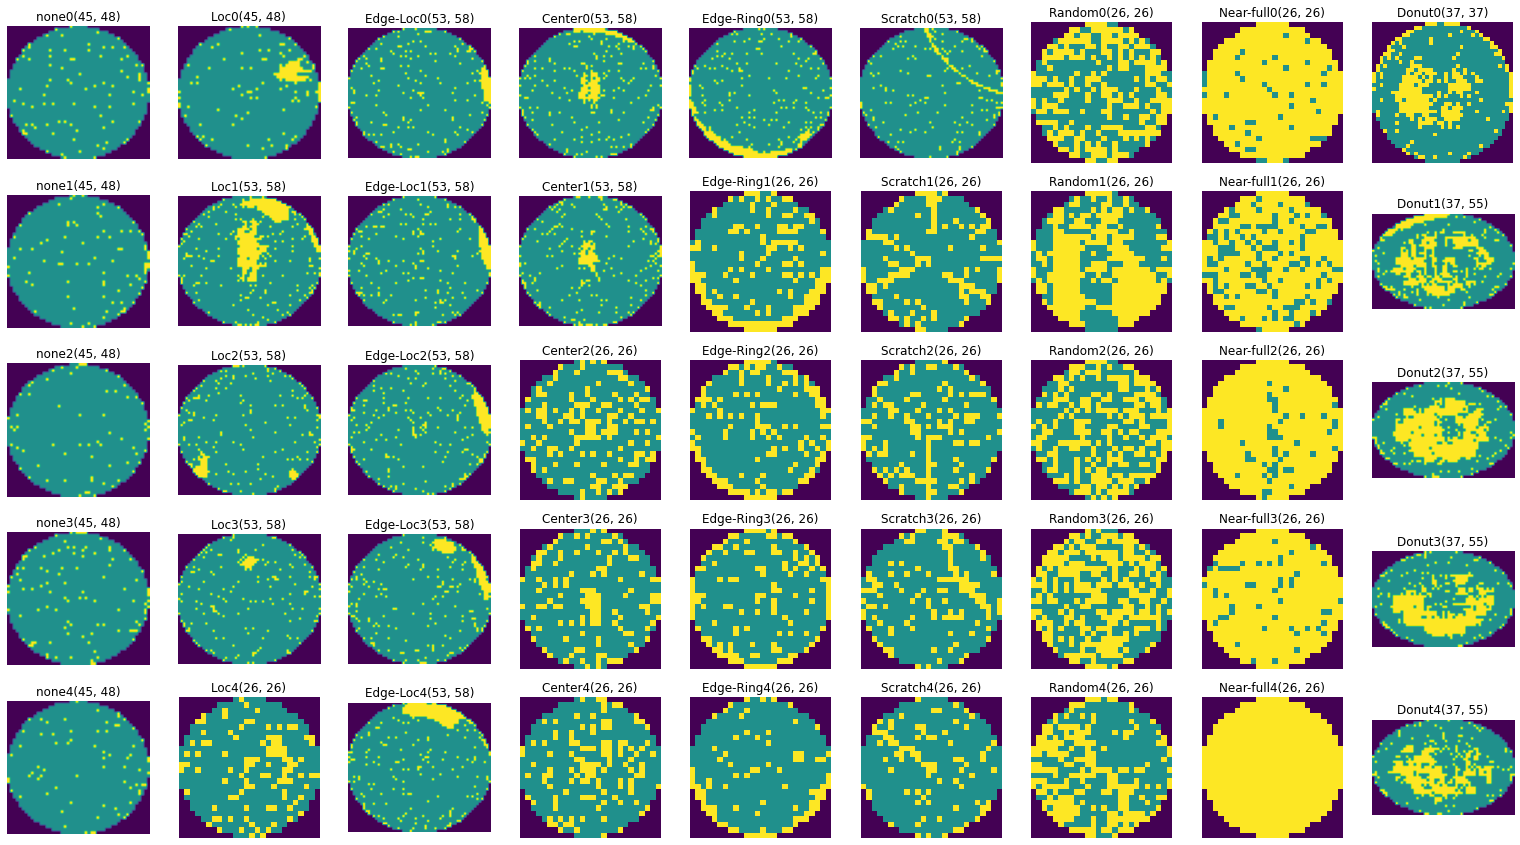

In [37]:
failureType_cols = df_new['failureType'].unique()

rows = 5
cols = len(failureType_cols)
n = rows*cols
fig, axes = plt.subplots(rows, cols, figsize=(cols*3, rows*3))

for col in range(cols):
  data = df_new[df_new['failureType'] == failureType_cols[col]][:rows]
  for row in range(rows):
    r = row
    c = col
    ax = axes[r][c]
    ax.imshow(data['waferMap'].iloc[row])
    ax.set_title(failureType_cols[col] + str(row) + str(data['waferMapDim'].iloc[row]))
    ax.axis('off')

plt.show()

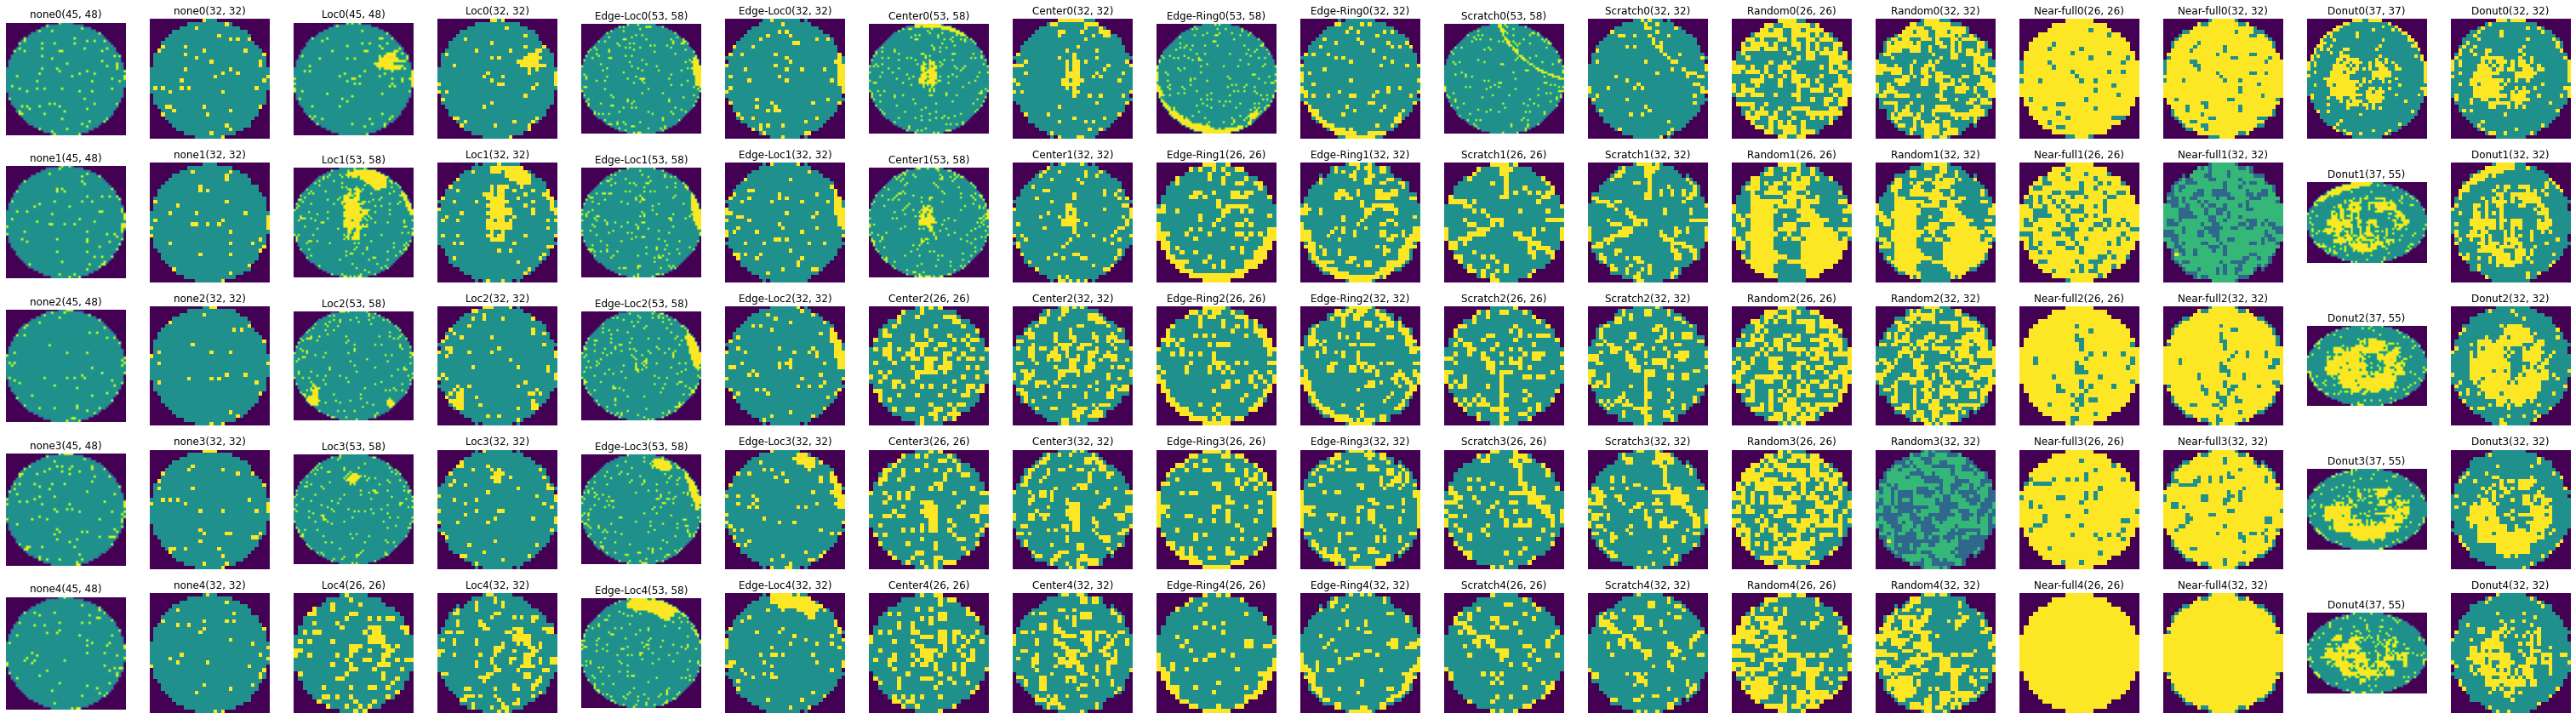

In [38]:
# waferMap과 waferMap_resize 비교

failureType_cols = df_new['failureType'].unique()

rows = 5
cols = len(failureType_cols)*2
n = rows*cols
fig, axes = plt.subplots(rows, cols, figsize=(cols*3, rows*3))

for col in range(int(cols/2)):
  data = df_new[df_new['failureType'] == failureType_cols[col]][:rows]
  for row in range(rows):
    r = row
    c = 2*col
    ax = axes[r][c]
    ax.imshow(data['waferMap'].iloc[row])
    ax.set_title(failureType_cols[col] + str(row) + str(data['waferMapDim'].iloc[row]))
    ax.axis('off')
    ax2 = axes[r][c + 1]
    ax2.imshow(data['waferMap_resize'].iloc[row])
    ax2.set_title(failureType_cols[col] + str(row) + str((width, width)))
    ax2.axis('off')

plt.show()

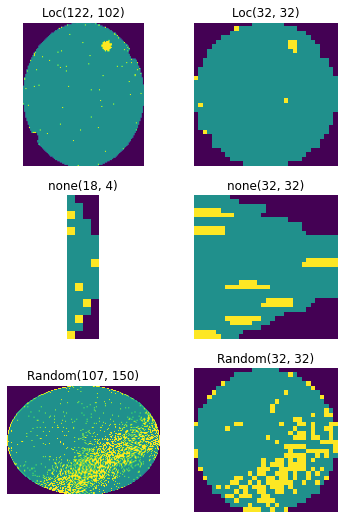

In [39]:
# 사이즈가 특이한 이미지 몇 개 골라서 확인

special_size = [(122, 102), (18, 4), (107, 150)]

fig, axes = plt.subplots(len(special_size), 2, figsize=(2*3, len(special_size)*3))

for i in range(len(special_size)):
  data = df_new[df_new['waferMapDim'] == special_size[i]]
  ax = axes[i][0]
  ax.imshow(data['waferMap'].iloc[0])
  ax.set_title(data['failureType'].iloc[0] + str(special_size[i]))
  ax.axis('off')
  ax2 = axes[i][1]
  ax2.imshow(data['waferMap_resize'].iloc[0])
  ax2.set_title(data['failureType'].iloc[0] + str((width, width)))
  ax2.axis('off')

plt.show()

In [40]:
# none(18, 4)와 같은 예외 제거

def check_4endpoint(x):
  row = x.shape[0]
  col = x.shape[1]

  if x[0][0] + x[row - 1][0] + x[0][col - 1] + x[row - 1][col - 1] > 0:
    return True
  else:
    return False

df_new['outlier'] = df_new.waferMap.apply(check_4endpoint)

In [41]:
df_new['outlier'].value_counts()

False    172945
True          5
Name: outlier, dtype: int64

In [42]:
df_outlier = df_new[df_new['outlier'] == True]

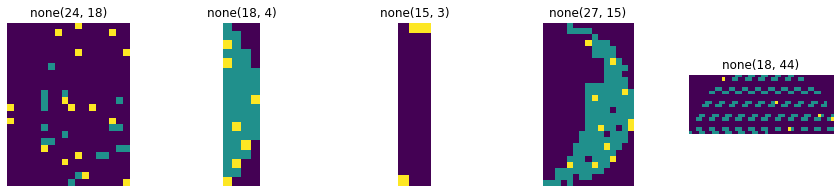

In [43]:
fig, axes = plt.subplots(1, len(df_outlier), figsize=(len(df_outlier)*3, 1*3))

for i in range(len(df_outlier)):
  ax = axes[i]
  ax.imshow(df_outlier['waferMap'].iloc[i])
  ax.set_title(df_outlier['failureType'].iloc[i] + str(df_outlier['waferMapDim'].iloc[i]))
  ax.axis('off')

plt.show()

In [44]:
df_new = df_new[df_new['outlier'] == False]

In [45]:
df_new['outlier'].value_counts()

False    172945
Name: outlier, dtype: int64

In [46]:
# ram 용량 부족해서 미리 none drop
print(df_new.shape)

none = df_new[df_new['failureType'] == 'none'].sample(10000)
df_new.drop(df_new[df_new['failureType'] == 'none'].index, inplace = True)
print(none.shape)
print(df_new.shape)

(172945, 6)
(10000, 6)
(25519, 6)


In [47]:
df_new = pd.concat([df_new, none], ignore_index=True)
print(df_new.shape)

(35519, 6)


In [48]:
# reshape

wafers = df_new['waferMap_resize'].values

images = []
label = []

for i in range(len(df_new)):
  images.append(wafers[i])
  label.append(df_new.iloc[i,:]['failureType'])

In [49]:
images = np.array(images)
label = np.array(label)

print(images.shape)
print(label.shape)

(35519, 32, 32)
(35519,)


In [50]:
# add channel
x = images.reshape((-1, width, width, 1))
y = label.reshape((-1,1))

In [51]:
# check dimension
print('x shape : {}, y shape : {}'.format(x.shape, y.shape))

x shape : (35519, 32, 32, 1), y shape : (35519, 1)


In [52]:
faulty_case = np.unique(label)
print('Faulty case list : {}'.format(faulty_case))

Faulty case list : ['Center' 'Donut' 'Edge-Loc' 'Edge-Ring' 'Loc' 'Near-full' 'Random'
 'Scratch' 'none']


In [53]:
faulty_case_dict = dict()

In [54]:
for i, f in enumerate(faulty_case) :
    print('{} : {}'.format(f, len(y[y == f])))
    faulty_case_dict[i] = f

Center : 4294
Donut : 555
Edge-Loc : 5189
Edge-Ring : 9680
Loc : 3593
Near-full : 149
Random : 866
Scratch : 1193
none : 10000


['Loc']


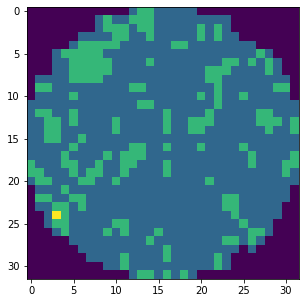

In [55]:
index = 29
plt.imshow(x[index,:,:,0])
print(y[index])

In [56]:
new_x = np.zeros((len(x), width, width, 3))

for w in range(len(x)):
    for i in range(width):
        for j in range(width):
          if x[w, i, j] == 3:
            new_x[w, i, j, int(x[w, i, j]) - 1] = 1
          else:
            new_x[w, i, j, int(x[w, i, j])] = 1

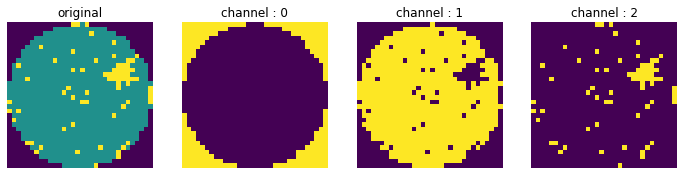

In [57]:
# 이미지로 channel 확인
fig, axes = plt.subplots(1, 4, figsize=(4*3, 1*3))

ax = axes[0]
ax.imshow(x[0, :, :, 0])
ax.set_title("original")
ax.axis('off')

for i in range(3):
  ax = axes[i + 1]
  ax.imshow(new_x[0, :, :, i])
  ax.set_title("channel : {}".format(i))
  ax.axis('off')

plt.show()

In [58]:
#check new x dimension
new_x.shape

(35519, 32, 32, 3)

In [59]:
# split data train, test
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.3,
                                                    stratify=y, random_state=42)

In [60]:
x_train.shape

(24863, 32, 32, 1)

# 4. Data Augmentation

### GAN

Build Model

In [ ]:
img_rows = 26
img_cols = 26
channels = 1

# Input image dimensions
img_shape = (img_rows, img_cols, channels)

# Size of the noise vector, used as input to the Generator
z_dim = 100

In [ ]:
def build_generator(img_shape, z_dim):
    model = keras.models.Sequential()
    model.add(keras.layers.Dense(256, input_dim=z_dim))
    model.add(keras.layers.LeakyReLU(alpha=0.01))
    model.add(keras.layers.Dense(512, input_dim=z_dim))
    model.add(keras.layers.LeakyReLU(alpha=0.01))
    model.add(keras.layers.Dense(1024, input_dim=z_dim))
    model.add(keras.layers.LeakyReLU(alpha=0.01))
    model.add(keras.layers.Dense(img_rows*img_cols*channels, activation='relu'))
    model.add(keras.layers.Reshape(img_shape))

    return model

def build_discriminator(img_shape):
    model = keras.models.Sequential()
    model.add(keras.layers.Flatten(input_shape=img_shape))
    model.add(keras.layers.Dense(1024))
    model.add(keras.layers.LeakyReLU(alpha=0.01))
    model.add(keras.layers.Dense(512))
    model.add(keras.layers.LeakyReLU(alpha=0.01))
    model.add(keras.layers.Dense(256))
    model.add(keras.layers.LeakyReLU(alpha=0.01))
    model.add(keras.layers.Dense(1, activation='sigmoid'))

    return model

In [ ]:
def build_gan(generator, discriminator):
  model = keras.models.Sequential()
  
  # Combined Generator -> Discriminator model
  model.add(generator)
  model.add(discriminator)

  return model

In [ ]:
adam = tf.keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5)

# Build and compile the Discriminator
discriminator = build_discriminator(img_shape)
discriminator.compile(loss='binary_crossentropy',
                      optimizer=adam,
                      metrics=['accuracy'])

# Build the Generator
generator = build_generator(img_shape, z_dim)

# Keep Discriminator’s parameters constant for Generator training
discriminator.trainable = False

# Build and compile GAN model with fixed Discriminator to train the Generator
gan = build_gan(generator, discriminator)
gan.compile(loss='binary_crossentropy', optimizer=adam)

Training

In [ ]:
losses = []
accuracies = []
iteration_checkpoints = []

def train(iterations, batch_size, sample_interval):

    # Load the dataset
    X_train = x_train

    # Labels for real images: all ones
    real = np.ones((batch_size, 1))

    # Labels for fake images: all zeros
    fake = np.zeros((batch_size, 1))

    for iteration in range(iterations):

        # -------------------------
        #  Train the Discriminator
        # -------------------------

        # Get a random batch of real images
        idx = np.random.randint(0, X_train.shape[0], batch_size)
        imgs = X_train[idx]

        # Generate a batch of fake images
        z = np.random.normal(0, 1, (batch_size, 100))
        gen_imgs = generator.predict(z)

        # Train Discriminator
        d_loss_real = discriminator.train_on_batch(imgs, real)
        d_loss_fake = discriminator.train_on_batch(gen_imgs, fake)
        d_loss, accuracy = 0.5 * np.add(d_loss_real, d_loss_fake)

        # ---------------------
        #  Train the Generator
        # ---------------------

        # Generate a batch of fake images
        z = np.random.normal(0, 1, (batch_size, 100))
        gen_imgs = generator.predict(z)

        # Train Generator
        g_loss = gan.train_on_batch(z, real,)

        if (iteration + 1) % sample_interval == 0:

            # Save losses and accuracies so they can be plotted after training
            losses.append((d_loss, g_loss))
            accuracies.append(100.0 * accuracy)
            iteration_checkpoints.append(iteration + 1)

            # Output training progress
            print("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" %
                  (iteration + 1, d_loss, 100.0 * accuracy, g_loss))

            # Output a sample of generated image
            sample_images(generator)

In [ ]:
def sample_images(generator, image_grid_rows=4, image_grid_columns=4):

    # Sample random noise
    z = np.random.normal(0, 1, (image_grid_rows * image_grid_columns, z_dim))

    # Generate images from random noise
    gen_imgs = generator.predict(z)

    # Rescale image pixel values to [0, 1, 2]
    gen_imgs = np.where(gen_imgs < 0.5, 0, gen_imgs)
    gen_imgs = np.where((gen_imgs >= 0.5) & (gen_imgs < 1.5), 1, gen_imgs)
    gen_imgs = np.where(gen_imgs >= 1.5, 2, gen_imgs)

    # Set image grid
    fig, axs = plt.subplots(image_grid_rows,
                            image_grid_columns,
                            figsize=(4, 4),
                            sharey=True,
                            sharex=True)

    cnt = 0
    for i in range(image_grid_rows):
        for j in range(image_grid_columns):
            # Output a grid of images
            axs[i, j].imshow(gen_imgs[cnt, :, :, 0])
            axs[i, j].axis('off')
            cnt += 1

1000 [D loss: 0.621417, acc.: 65.23%] [G loss: 2.242155]
2000 [D loss: 0.698907, acc.: 49.22%] [G loss: 0.822728]
3000 [D loss: 0.675776, acc.: 60.94%] [G loss: 0.847558]
4000 [D loss: 0.678840, acc.: 53.12%] [G loss: 0.779520]
5000 [D loss: 0.679856, acc.: 51.17%] [G loss: 0.773116]
6000 [D loss: 0.671546, acc.: 53.52%] [G loss: 0.779805]


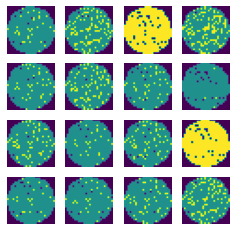

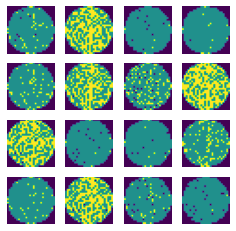

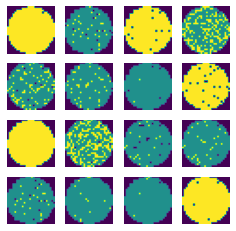

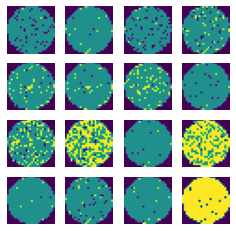

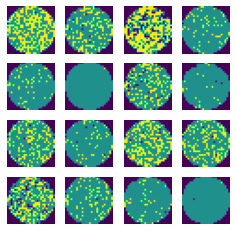

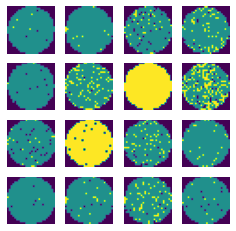

In [ ]:
# Set hyperparameters
iterations = 6000
batch_size = 128
sample_interval = 1000

# Train the GAN for the specified number of iterations
train(iterations, batch_size, sample_interval)

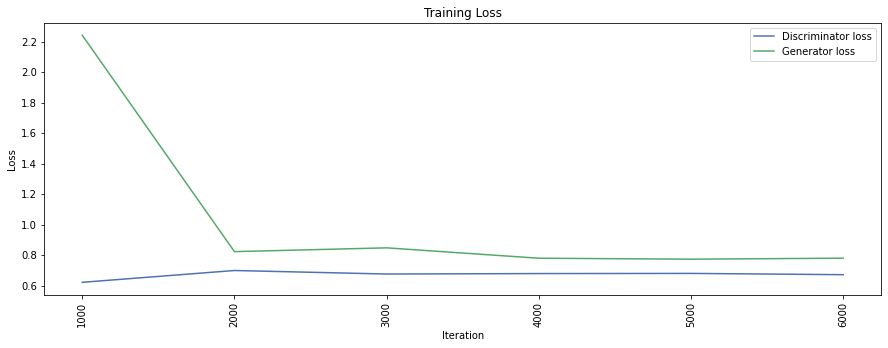

In [ ]:
losses = np.array(losses)

# Plot training losses for Discriminator and Generator
plt.figure(figsize=(15, 5))
plt.plot(iteration_checkpoints, losses.T[0], label="Discriminator loss")
plt.plot(iteration_checkpoints, losses.T[1], label="Generator loss")

plt.xticks(iteration_checkpoints, rotation=90)

plt.title("Training Loss")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()

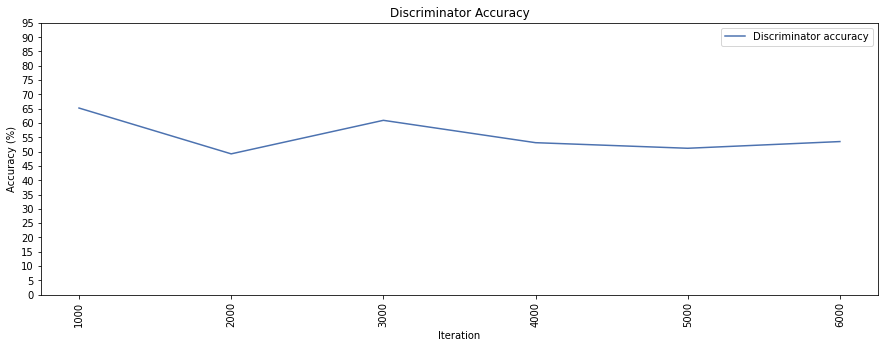

In [ ]:
accuracies = np.array(accuracies)

# Plot Discriminator accuracy
plt.figure(figsize=(15, 5))
plt.plot(iteration_checkpoints, accuracies, label="Discriminator accuracy")

plt.xticks(iteration_checkpoints, rotation=90)
plt.yticks(range(0, 100, 5))

plt.title("Discriminator Accuracy")
plt.xlabel("Iteration")
plt.ylabel("Accuracy (%)")
plt.legend()

### GAN (none 제외)

In [ ]:
x_train_except_none = []
y_train_except_none = []

for i, j in zip(x_train, y_train):
  if j != 'none':
    x_train_except_none.append(i)
    y_train_except_none.append(j)

x_train_except_none = np.array(x_train_except_none)
y_train_except_none = np.array(y_train_except_none)

In [ ]:
# check dimension
print('x shape : {}, y shape : {}'.format(x_train_except_none.shape, x_train_except_none.shape))

x shape : (17098, 26, 26, 1), y shape : (17098, 26, 26, 1)


In [ ]:
adam = tf.keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5)

# Build and compile the Discriminator
discriminator_except_none = build_discriminator(img_shape)
discriminator_except_none.compile(loss='binary_crossentropy',
                      optimizer=adam,
                      metrics=['accuracy'])

# Build the Generator
generator_except_none = build_generator(img_shape, z_dim)

# Keep Discriminator’s parameters constant for Generator training
discriminator_except_none.trainable = False

# Build and compile GAN model with fixed Discriminator to train the Generator
gan_except_none = build_gan(generator_except_none, discriminator_except_none)
gan_except_none.compile(loss='binary_crossentropy', optimizer=adam)

Training

In [ ]:
losses = []
accuracies = []
iteration_checkpoints = []

def train_except_none(iterations, batch_size, sample_interval):

    # Load the dataset
    X_train = x_train_except_none

    # Labels for real images: all ones
    real = np.ones((batch_size, 1))

    # Labels for fake images: all zeros
    fake = np.zeros((batch_size, 1))

    for iteration in range(iterations):

        # -------------------------
        #  Train the Discriminator
        # -------------------------

        # Get a random batch of real images
        idx = np.random.randint(0, X_train.shape[0], batch_size)
        imgs = X_train[idx]

        # Generate a batch of fake images
        z = np.random.normal(0, 1, (batch_size, 100))
        gen_imgs = generator_except_none.predict(z)

        # Train Discriminator
        d_loss_real = discriminator_except_none.train_on_batch(imgs, real)
        d_loss_fake = discriminator_except_none.train_on_batch(gen_imgs, fake)
        d_loss, accuracy = 0.5 * np.add(d_loss_real, d_loss_fake)

        # ---------------------
        #  Train the Generator
        # ---------------------

        # Generate a batch of fake images
        z = np.random.normal(0, 1, (batch_size, 100))
        gen_imgs = generator_except_none.predict(z)

        # Train Generator
        g_loss = gan_except_none.train_on_batch(z, real,)

        if (iteration + 1) % sample_interval == 0:

            # Save losses and accuracies so they can be plotted after training
            losses.append((d_loss, g_loss))
            accuracies.append(100.0 * accuracy)
            iteration_checkpoints.append(iteration + 1)

            # Output training progress
            print("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" %
                  (iteration + 1, d_loss, 100.0 * accuracy, g_loss))

            # Output a sample of generated image
            sample_images(generator_except_none)

1000 [D loss: 0.617374, acc.: 79.69%] [G loss: 0.979663]
2000 [D loss: 0.662887, acc.: 56.64%] [G loss: 0.814722]
3000 [D loss: 0.686743, acc.: 59.38%] [G loss: 0.751163]
4000 [D loss: 0.690027, acc.: 45.31%] [G loss: 0.733089]
5000 [D loss: 0.677126, acc.: 55.08%] [G loss: 0.743069]
6000 [D loss: 0.682962, acc.: 53.12%] [G loss: 0.776322]


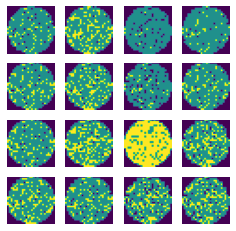

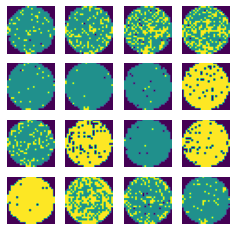

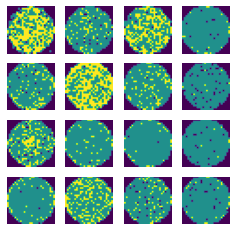

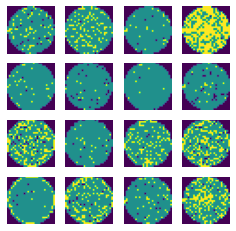

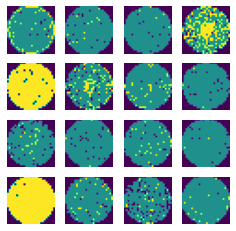

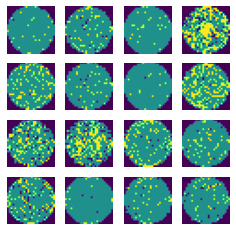

In [ ]:
# Set hyperparameters
iterations = 6000
batch_size = 128
sample_interval = 1000

# Train the GAN for the specified number of iterations
train_except_none(iterations, batch_size, sample_interval)

https://github.com/GANs-in-Action/gans-in-action/blob/master/chapter-3/Chapter_3_GAN.ipynb

### DCGAN (none 제외)

In [89]:
# split data train, test
x_train, x_test, y_train, y_test = train_test_split(new_x, y,
                                                    test_size=0.3,
                                                    stratify=y, random_state=42)

x_train_except_none = []
y_train_except_none = []

for i, j in zip(x_train, y_train):
  if j != 'none':
    x_train_except_none.append(i)
    y_train_except_none.append(j)

x_train_except_none = np.array(x_train_except_none)
y_train_except_none = np.array(y_train_except_none)

In [90]:
# check dimension
print('x shape : {}, y shape : {}'.format(x_train_except_none.shape, x_train_except_none.shape))

x shape : (17863, 32, 32, 3), y shape : (17863, 32, 32, 3)


In [91]:
img_rows = width
img_cols = width
channels = 3

# Input image dimensions
img_shape = (img_rows, img_cols, channels)

# Size of the noise vector, used as input to the Generator
z_dim = 100

In [119]:
class Gan:
  def __init__(self, img_shape, z_dim):
    self.img_shape = img_shape
    self.z_dim = z_dim

    # build G and D
    self.build_dcgenerator()
    self.build_dcdiscriminator()

    # build model to train D
    adam_d = tf.keras.optimizers.Adam(learning_rate=0.0008, beta_1=0.5)
    self.D.compile(loss='binary_crossentropy',
                      optimizer=adam_d,
                      metrics=['accuracy'])
    
    # build model to train G
    adam_g = tf.keras.optimizers.Adam(learning_rate=0.0004, beta_1=0.5)
    self.D.trainable = False
    self.gan = keras.models.Sequential()
    self.gan.add(self.G)
    self.gan.add(self.D)
    self.gan.compile(loss='binary_crossentropy', optimizer=adam_g)

    # train
    self.losses = []
    self.accuracies = []
    self.iteration_checkpoints = []
  
  def build_dcgenerator(self):
    dropout = 0.4
    depth = 8*4
    dim = int(self.img_shape[1]/2)
    self.G = keras.models.Sequential()
    self.G.add(keras.layers.Dense(dim*dim*depth, input_dim=self.z_dim))
    self.G.add(keras.layers.BatchNormalization(momentum=0.9))
    self.G.add(keras.layers.Activation('relu'))
    self.G.add(keras.layers.Reshape((dim, dim, depth)))
    self.G.add(keras.layers.Dropout(dropout))
    self.G.add(keras.layers.UpSampling2D())
    self.G.add(keras.layers.Conv2DTranspose(int(depth/2), 5, padding='same'))
    self.G.add(keras.layers.BatchNormalization(momentum=0.9))
    self.G.add(keras.layers.Activation('relu'))
    self.G.add(keras.layers.Conv2DTranspose(int(depth/4), 5, padding='same'))
    self.G.add(keras.layers.BatchNormalization(momentum=0.9))
    self.G.add(keras.layers.Activation('relu'))
    #model.add(keras.layers.Conv2DTranspose(int(depth/8), 5, padding='same'))
    #model.add(keras.layers.BatchNormalization(momentum=0.9))
    #model.add(keras.layers.Activation('relu'))
    self.G.add(keras.layers.Conv2DTranspose(3, 5, padding='same'))
    self.G.add(keras.layers.Activation('sigmoid'))
    self.G.summary()
    return self.G

  def build_dcdiscriminator(self):
    self.D = keras.models.Sequential()
    dropout = 0.4
    depth = 8
    self.D.add(keras.layers.Conv2D(depth*1, 5, strides=2, input_shape=self.img_shape, padding='same'))
    self.D.add(keras.layers.LeakyReLU(alpha=0.2))
    self.D.add(keras.layers.Dropout(dropout))
    self.D.add(keras.layers.Conv2D(depth*2, 5, strides=2, padding='same'))
    self.D.add(keras.layers.LeakyReLU(alpha=0.2))
    self.D.add(keras.layers.Dropout(dropout))
    self.D.add(keras.layers.Conv2D(depth*4, 5, strides=2, padding='same'))
    self.D.add(keras.layers.LeakyReLU(alpha=0.2))
    self.D.add(keras.layers.Dropout(dropout))
    self.D.add(keras.layers.Conv2D(depth*8, 5, strides=1, padding='same'))

    self.D.add(keras.layers.Flatten())
    self.D.add(keras.layers.Dense(1, activation='sigmoid'))
    self.D.summary()
    return self.D

  def train(self, x_train_, iterations, batch_size, sample_interval):

    # Load the dataset
    X_train = x_train_

    # Labels for real images: all ones
    real = np.ones((batch_size, 1))

    # Labels for fake images: all zeros
    fake = np.zeros((batch_size, 1))

    for iteration in tqdm(range(iterations)):

        # -------------------------
        #  Train the Discriminator
        # -------------------------

        # Get a random batch of real images
        idx = np.random.randint(0, X_train.shape[0], batch_size)
        imgs = X_train[idx]

        # Generate a batch of fake images
        z = np.random.normal(0, 1, (batch_size, 100))
        gen_imgs = self.G.predict(z)

        # Train D
        d_loss_real = self.D.train_on_batch(imgs, real)
        d_loss_fake = self.D.train_on_batch(gen_imgs, fake)
        d_loss, accuracy = 0.5 * np.add(d_loss_real, d_loss_fake)

        # ---------------------
        #  Train the Generator
        # ---------------------

        # Generate a batch of fake images
        z = np.random.normal(0, 1, (batch_size, 100))
        gen_imgs = self.G.predict(z)

        # Train G
        g_loss = self.gan.train_on_batch(z, real,)

        if (iteration + 1) % sample_interval == 0:

            # Save losses and accuracies so they can be plotted after training
            self.losses.append((d_loss, g_loss))
            self.accuracies.append(100.0 * accuracy)
            self.iteration_checkpoints.append(iteration + 1)

            # Output training progress
            print("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" %
                  (iteration + 1, d_loss, 100.0 * accuracy, g_loss))

            # Output a sample of generated image
            self.sample_images()

  def sample_images(self, image_grid_rows=4, image_grid_columns=4):
    # Sample random noise
    z = np.random.normal(0, 1, (image_grid_rows * image_grid_columns, z_dim))

    # Generate images from random noise
    gen_imgs = self.G.predict(z)

    # Rescale image pixel values to [0, 1, 2]
    gen_imgs = np.argmax(gen_imgs, axis=-1)

    # Set image grid
    fig, axs = plt.subplots(image_grid_rows,
                            image_grid_columns,
                            figsize=(4, 4),
                            sharey=True,
                            sharex=True)

    cnt = 0
    for i in range(image_grid_rows):
        for j in range(image_grid_columns):
            # Output a grid of images
            axs[i, j].imshow(gen_imgs[cnt, :, :])
            axs[i, j].axis('off')
            cnt += 1

In [120]:
gan = Gan(img_shape, z_dim)

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 8192)              827392    
_________________________________________________________________
batch_normalization_18 (Batc (None, 8192)              32768     
_________________________________________________________________
activation_23 (Activation)   (None, 8192)              0         
_________________________________________________________________
reshape_8 (Reshape)          (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_20 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
up_sampling2d_5 (UpSampling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_transpose_15 (Conv2DT (None, 32, 32, 16)      

Training

In [121]:
from tqdm import tqdm

  2%|▏         | 99/6000 [02:46<2:40:09,  1.63s/it]

100 [D loss: 0.122538, acc.: 94.53%] [G loss: 2.130662]


  3%|▎         | 199/6000 [05:20<2:26:46,  1.52s/it]

200 [D loss: 0.008813, acc.: 100.00%] [G loss: 6.087113]


  5%|▍         | 299/6000 [07:52<2:22:28,  1.50s/it]

300 [D loss: 0.128448, acc.: 96.48%] [G loss: 2.527060]


  7%|▋         | 399/6000 [10:28<2:31:28,  1.62s/it]

400 [D loss: 0.101531, acc.: 99.22%] [G loss: 4.078073]


  8%|▊         | 499/6000 [13:02<2:21:51,  1.55s/it]

500 [D loss: 0.199329, acc.: 91.80%] [G loss: 7.760307]


 10%|▉         | 599/6000 [15:35<2:19:59,  1.56s/it]

600 [D loss: 0.324858, acc.: 86.72%] [G loss: 4.414053]


 12%|█▏        | 699/6000 [18:10<2:18:08,  1.56s/it]

700 [D loss: 0.319662, acc.: 85.16%] [G loss: 4.965456]


 13%|█▎        | 799/6000 [20:48<2:14:15,  1.55s/it]

800 [D loss: 0.339594, acc.: 84.77%] [G loss: 3.806192]


 15%|█▍        | 899/6000 [23:26<2:10:25,  1.53s/it]

900 [D loss: 0.324101, acc.: 85.55%] [G loss: 4.298864]


 17%|█▋        | 999/6000 [26:07<2:07:44,  1.53s/it]

1000 [D loss: 0.295386, acc.: 87.11%] [G loss: 4.198127]


 18%|█▊        | 1099/6000 [28:39<2:01:17,  1.48s/it]

1100 [D loss: 0.283654, acc.: 86.72%] [G loss: 3.907165]


 20%|█▉        | 1199/6000 [31:08<1:58:21,  1.48s/it]

1200 [D loss: 0.356018, acc.: 83.59%] [G loss: 3.653046]


 22%|██▏       | 1299/6000 [33:38<1:58:25,  1.51s/it]

1300 [D loss: 0.459882, acc.: 77.34%] [G loss: 2.454082]


 23%|██▎       | 1399/6000 [36:09<1:55:04,  1.50s/it]

1400 [D loss: 0.411016, acc.: 81.25%] [G loss: 2.737139]


 25%|██▍       | 1499/6000 [38:38<1:51:06,  1.48s/it]

1500 [D loss: 0.428710, acc.: 80.47%] [G loss: 2.105767]


 27%|██▋       | 1599/6000 [41:09<1:49:02,  1.49s/it]

1600 [D loss: 0.453533, acc.: 80.47%] [G loss: 2.113357]


 28%|██▊       | 1699/6000 [43:39<1:47:46,  1.50s/it]

1700 [D loss: 0.466929, acc.: 78.91%] [G loss: 2.035422]


 30%|██▉       | 1799/6000 [46:14<1:48:18,  1.55s/it]

1800 [D loss: 0.459133, acc.: 77.34%] [G loss: 1.864655]


 32%|███▏      | 1899/6000 [48:50<1:45:49,  1.55s/it]

1900 [D loss: 0.519025, acc.: 72.27%] [G loss: 1.608745]


 33%|███▎      | 1999/6000 [51:28<1:44:31,  1.57s/it]

2000 [D loss: 0.578196, acc.: 68.75%] [G loss: 1.710542]


 35%|███▍      | 2099/6000 [54:05<1:39:34,  1.53s/it]

2100 [D loss: 0.526339, acc.: 73.83%] [G loss: 1.747715]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:144: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 37%|███▋      | 2199/6000 [56:47<1:49:03,  1.72s/it]

2200 [D loss: 0.522759, acc.: 73.05%] [G loss: 1.821508]


 38%|███▊      | 2299/6000 [59:23<1:36:55,  1.57s/it]

2300 [D loss: 0.575878, acc.: 67.58%] [G loss: 1.535846]


 40%|███▉      | 2399/6000 [1:02:06<1:37:29,  1.62s/it]

2400 [D loss: 0.491144, acc.: 76.95%] [G loss: 1.674034]


 42%|████▏     | 2499/6000 [1:04:51<1:36:41,  1.66s/it]

2500 [D loss: 0.549029, acc.: 71.09%] [G loss: 1.581264]


 43%|████▎     | 2599/6000 [1:07:36<1:35:09,  1.68s/it]

2600 [D loss: 0.598487, acc.: 64.45%] [G loss: 1.455831]


 45%|████▍     | 2699/6000 [1:10:21<1:30:47,  1.65s/it]

2700 [D loss: 0.582174, acc.: 71.09%] [G loss: 1.596997]


 47%|████▋     | 2799/6000 [1:13:06<1:28:24,  1.66s/it]

2800 [D loss: 0.559479, acc.: 68.75%] [G loss: 1.448692]


 48%|████▊     | 2899/6000 [1:15:51<1:25:03,  1.65s/it]

2900 [D loss: 0.627263, acc.: 62.50%] [G loss: 1.503944]


 50%|████▉     | 2999/6000 [1:18:40<1:22:51,  1.66s/it]

3000 [D loss: 0.677364, acc.: 57.81%] [G loss: 1.157584]


 52%|█████▏    | 3099/6000 [1:21:29<1:22:04,  1.70s/it]

3100 [D loss: 0.565693, acc.: 73.05%] [G loss: 1.289807]


 53%|█████▎    | 3199/6000 [1:24:16<1:17:08,  1.65s/it]

3200 [D loss: 0.587910, acc.: 66.41%] [G loss: 1.367555]


 55%|█████▍    | 3299/6000 [1:27:03<1:15:16,  1.67s/it]

3300 [D loss: 0.621610, acc.: 66.80%] [G loss: 1.420249]


 55%|█████▌    | 3308/6000 [1:27:18<1:11:03,  1.58s/it]


KeyboardInterrupt: ignored

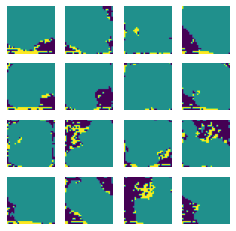

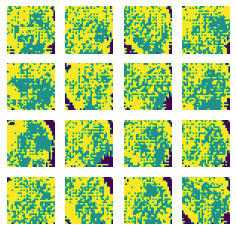

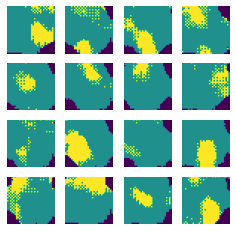

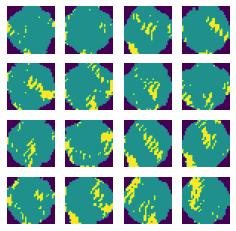

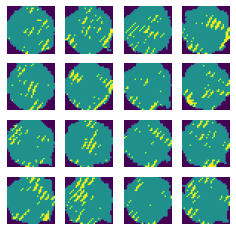

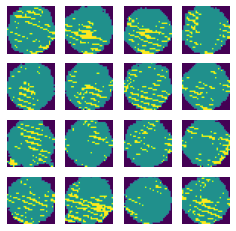

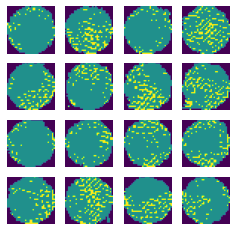

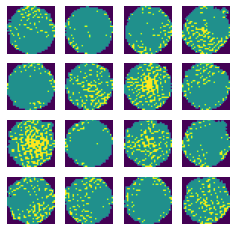

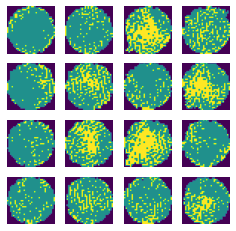

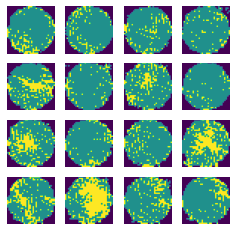

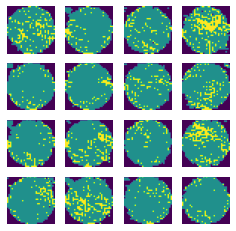

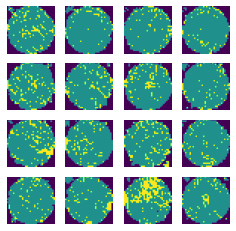

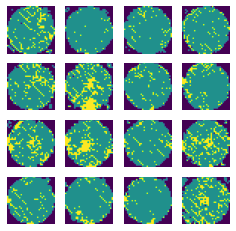

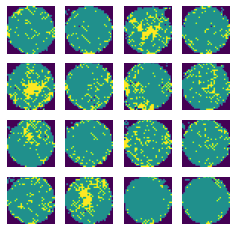

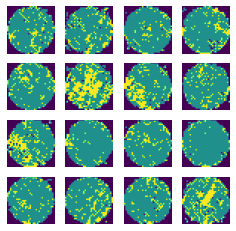

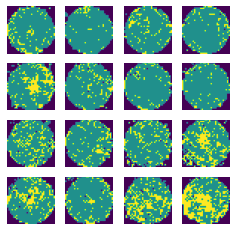

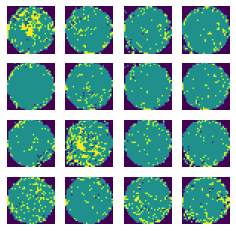

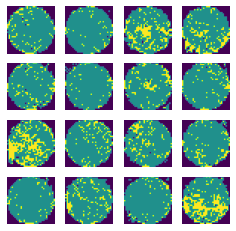

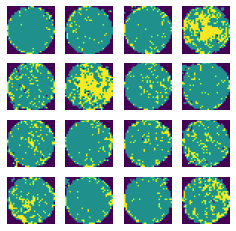

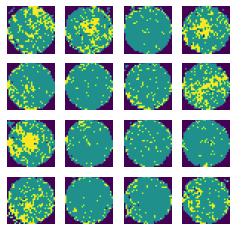

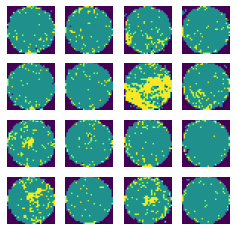

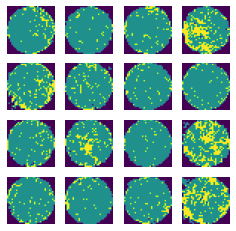

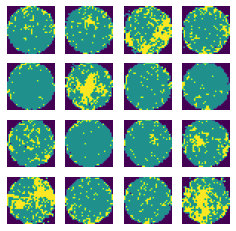

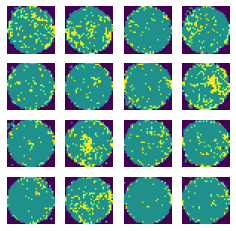

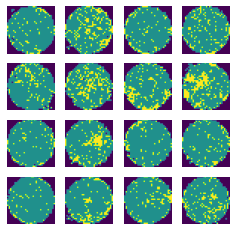

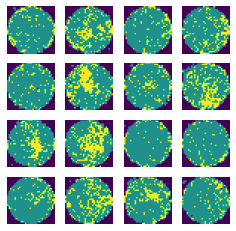

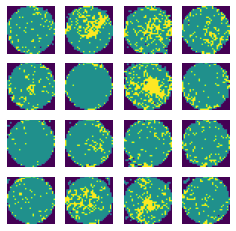

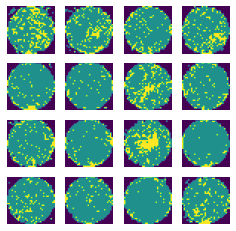

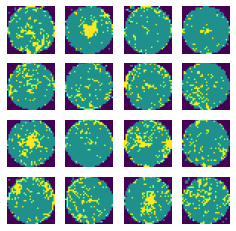

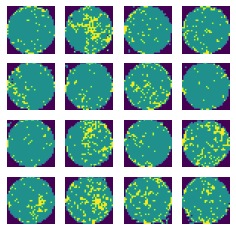

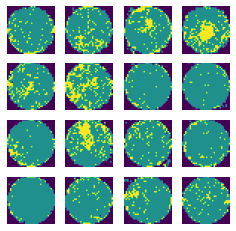

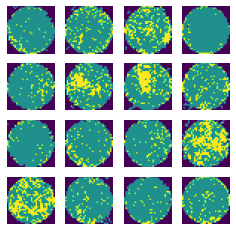

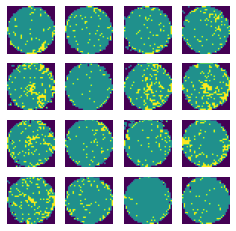

In [122]:
# Set hyperparameters
iterations = 6000
batch_size = 128
sample_interval = 100
gan.train
# Train the GAN for the specified number of iterations
gan.train(x_train_except_none, iterations, batch_size, sample_interval)

https://neurowhai.tistory.com/272

### GAN (none 제외 *개별*)

In [69]:
# split data train, test
x_train, x_test, y_train, y_test = train_test_split(new_x, y,
                                                    test_size=0.3,
                                                    stratify=y, random_state=42)

x_train_except_none = []
y_train_except_none = []

for i, j in zip(x_train, y_train):
  if j != 'none':
    x_train_except_none.append(i)
    y_train_except_none.append(j)

x_train_except_none = np.array(x_train_except_none)
y_train_except_none = np.array(y_train_except_none)

In [70]:
# check dimension
print('x shape : {}, y shape : {}'.format(x_train_except_none.shape, x_train_except_none.shape))

x shape : (17863, 32, 32, 3), y shape : (17863, 32, 32, 3)


In [71]:
img_rows = width
img_cols = width
channels = 3

# Input image dimensions
img_shape = (img_rows, img_cols, channels)

# Size of the noise vector, used as input to the Generator
z_dim = 100

In [84]:
class Gan:
  def __init__(self, img_shape, z_dim):
    self.img_shape = img_shape
    self.z_dim = z_dim

    # build G and D
    self.build_generator()
    self.build_discriminator()

    # build model to train D
    adam_d = tf.keras.optimizers.Adam(learning_rate=0.0008, beta_1=0.5)
    self.D.compile(loss='binary_crossentropy',
                      optimizer=adam_d,
                      metrics=['accuracy'])
    
    # build model to train G
    adam_g = tf.keras.optimizers.Adam(learning_rate=0.0004, beta_1=0.5)
    self.D.trainable = False
    self.gan = keras.models.Sequential()
    self.gan.add(self.G)
    self.gan.add(self.D)
    self.gan.compile(loss='binary_crossentropy', optimizer=adam_g)

    # train
    self.losses = []
    self.accuracies = []
    self.iteration_checkpoints = []

  def build_generator(self):
    self.G = keras.models.Sequential()
    self.G.add(keras.layers.Dense(256, input_dim=self.z_dim))
    self.G.add(keras.layers.LeakyReLU(alpha=0.01))
    self.G.add(keras.layers.Dense(512))
    self.G.add(keras.layers.LeakyReLU(alpha=0.01))
    self.G.add(keras.layers.Dense(1024))
    self.G.add(keras.layers.LeakyReLU(alpha=0.01))
    self.G.add(keras.layers.Dense(self.img_shape[0]*self.img_shape[1]*self.img_shape[2], activation='relu'))
    self.G.add(keras.layers.Reshape(self.img_shape))
    self.G.summary()
    return self.G

  def build_discriminator(self):
    self.D = keras.models.Sequential()
    self.D.add(keras.layers.Flatten(input_shape=self.img_shape))
    self.D.add(keras.layers.Dense(1024))
    self.D.add(keras.layers.LeakyReLU(alpha=0.01))
    self.D.add(keras.layers.Dense(512))
    self.D.add(keras.layers.LeakyReLU(alpha=0.01))
    self.D.add(keras.layers.Dense(256))
    self.D.add(keras.layers.LeakyReLU(alpha=0.01))
    self.D.add(keras.layers.Dense(1, activation='sigmoid'))
    self.D.summary()
    return self.D

  def train(self, x_train_, iterations, batch_size, sample_interval):

    # Load the dataset
    X_train = x_train_

    # Labels for real images: all ones
    real = np.ones((batch_size, 1))

    # Labels for fake images: all zeros
    fake = np.zeros((batch_size, 1))

    for iteration in tqdm(range(iterations)):

        # -------------------------
        #  Train the Discriminator
        # -------------------------

        # Get a random batch of real images
        idx = np.random.randint(0, X_train.shape[0], batch_size)
        imgs = X_train[idx]

        # Generate a batch of fake images
        z = np.random.normal(0, 1, (batch_size, 100))
        gen_imgs = self.G.predict(z)

        # Train D
        d_loss_real = self.D.train_on_batch(imgs, real)
        d_loss_fake = self.D.train_on_batch(gen_imgs, fake)
        d_loss, accuracy = 0.5 * np.add(d_loss_real, d_loss_fake)

        # ---------------------
        #  Train the Generator
        # ---------------------

        # Generate a batch of fake images
        z = np.random.normal(0, 1, (batch_size, 100))
        gen_imgs = self.G.predict(z)

        # Train G
        g_loss = self.gan.train_on_batch(z, real,)

        if (iteration + 1) % sample_interval == 0:

            # Save losses and accuracies so they can be plotted after training
            self.losses.append((d_loss, g_loss))
            self.accuracies.append(100.0 * accuracy)
            self.iteration_checkpoints.append(iteration + 1)

            # Output training progress
            print("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" %
                  (iteration + 1, d_loss, 100.0 * accuracy, g_loss))

            # Output a sample of generated image
            self.sample_images()

  def sample_images(self, image_grid_rows=4, image_grid_columns=4):
    # Sample random noise
    z = np.random.normal(0, 1, (image_grid_rows * image_grid_columns, z_dim))

    # Generate images from random noise
    gen_imgs = self.G.predict(z)

    # Rescale image pixel values to [0, 1, 2]
    gen_imgs = np.argmax(gen_imgs, axis=-1)

    # Set image grid
    fig, axs = plt.subplots(image_grid_rows,
                            image_grid_columns,
                            figsize=(4, 4),
                            sharey=True,
                            sharex=True)

    cnt = 0
    for i in range(image_grid_rows):
        for j in range(image_grid_columns):
            # Output a grid of images
            axs[i, j].imshow(gen_imgs[cnt, :, :])
            axs[i, j].axis('off')
            cnt += 1

In [81]:
failureType_cols

array(['none', 'Loc', 'Edge-Loc', 'Center', 'Edge-Ring', 'Scratch',
       'Random', 'Near-full', 'Donut'], dtype=object)

In [78]:
print('train')
for i, f in enumerate(faulty_case) :
    print('{} : {}'.format(f, len(y_train[y_train == f])))
    faulty_case_dict[i] = f

train
Center : 3006
Donut : 389
Edge-Loc : 3632
Edge-Ring : 6776
Loc : 2515
Near-full : 104
Random : 606
Scratch : 835
none : 7000


In [67]:
augmentation_cols = failureType_cols[1:]
augmentation_cols

array(['Loc', 'Edge-Loc', 'Center', 'Edge-Ring', 'Scratch', 'Random',
       'Near-full', 'Donut'], dtype=object)

In [ ]:
augmentation_cols = ['Donut', 'Loc', 'Near-full', 'Random', 'Scratch']

In [85]:
augmentation_x = []

gans = []
augmentation_params = []
for i in range(len(augmentation_cols )):
  gans.append(Gan(img_shape, z_dim))
  augmentation_params.append(len(y_train[y_train == "none"]) - len(y_train[y_train == augmentation_cols[0]]))

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_79 (Dense)             (None, 256)               25856     
_________________________________________________________________
leaky_re_lu_63 (LeakyReLU)   (None, 256)               0         
_________________________________________________________________
dense_80 (Dense)             (None, 512)               131584    
_________________________________________________________________
leaky_re_lu_64 (LeakyReLU)   (None, 512)               0         
_________________________________________________________________
dense_81 (Dense)             (None, 1024)              525312    
_________________________________________________________________
leaky_re_lu_65 (LeakyReLU)   (None, 1024)              0         
_________________________________________________________________
dense_82 (Dense)             (None, 3072)            

In [87]:
from tqdm import tqdm

Loc
2515


 17%|█▋        | 499/3000 [03:43<18:24,  2.26it/s]

500 [D loss: 0.699495, acc.: 48.83%] [G loss: 0.787934]


 33%|███▎      | 999/3000 [07:28<15:27,  2.16it/s]

1000 [D loss: 0.678837, acc.: 59.38%] [G loss: 0.813043]


 50%|████▉     | 1499/3000 [11:14<11:18,  2.21it/s]

1500 [D loss: 0.642806, acc.: 55.86%] [G loss: 0.809903]


 67%|██████▋   | 1999/3000 [15:02<07:33,  2.21it/s]

2000 [D loss: 0.619100, acc.: 62.89%] [G loss: 0.838125]


 83%|████████▎ | 2499/3000 [18:51<03:45,  2.22it/s]

2500 [D loss: 0.614041, acc.: 66.02%] [G loss: 0.998061]


100%|█████████▉| 2999/3000 [22:38<00:00,  2.17it/s]

3000 [D loss: 0.576967, acc.: 68.75%] [G loss: 1.050247]


100%|██████████| 3000/3000 [22:39<00:00,  2.21it/s]


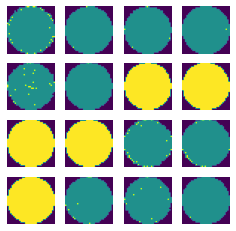

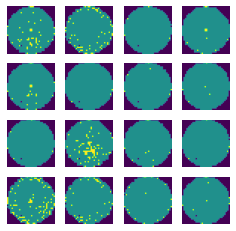

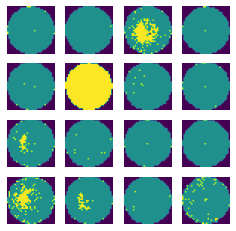

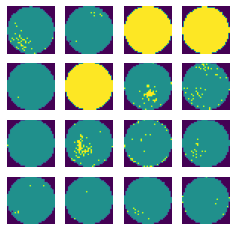

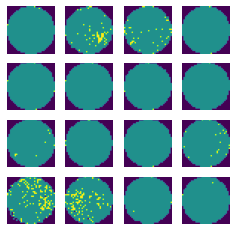

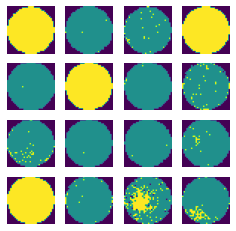

In [105]:
index = 0
where = np.where(y_train_except_none == augmentation_cols[index])[0]
print(augmentation_cols[index])
print(len(where))

# Set hyperparameters
iterations = 3000
batch_size = 128
sample_interval = 500

# Train the GAN for the specified number of iterations
gans[index].train(x_train_except_none[where], iterations, batch_size, sample_interval)

In [ ]:
z = np.random.normal(0, 1, (augmentation_params[0], 100))
augmentation_x.append(gans[0].G.predict(z))

### CAE (none 제외)

In [61]:
# split data train, test
x_train, x_test, y_train, y_test = train_test_split(new_x, y,
                                                    test_size=0.3,
                                                    stratify=y, random_state=42)

x_train_except_none = []
y_train_except_none = []

for i, j in zip(x_train, y_train):
  if j != 'none':
    x_train_except_none.append(i)
    y_train_except_none.append(j)

x_train_except_none = np.array(x_train_except_none)
y_train_except_none = np.array(y_train_except_none)

In [62]:
# check dimension
print('x shape : {}, y shape : {}'.format(x_train_except_none.shape, x_train_except_none.shape))

x shape : (17863, 32, 32, 3), y shape : (17863, 32, 32, 3)


In [63]:
# Encoder
input_shape = (width, width, 3)
input_tensor = Input(input_shape)
depth = 64
encode = keras.layers.Conv2D(depth, (3,3), padding='same', activation='relu')(input_tensor)

latent_vector = keras.layers.MaxPool2D()(encode)

# Decoder
decode_layer_1 = layers.Conv2DTranspose(depth, (3,3), padding='same', activation='relu')
decode_layer_2 = layers.UpSampling2D()
output_tensor = layers.Conv2DTranspose(3, (3,3), padding='same', activation='sigmoid')

# connect decoder layers
decode = decode_layer_1(latent_vector)
decode = decode_layer_2(decode)

ae = models.Model(input_tensor, output_tensor(decode))
ae.compile(optimizer = 'Adam',
              loss = 'mse',
             )

In [64]:
ae.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 16, 16, 64)        36928     
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 32, 32, 3)         1731      
Total params: 40,451
Trainable params: 40,451
Non-trainable params: 0
_________________________________________________________

In [65]:
# parameter
epoch=7
batch_size=128

In [66]:
# start train
ae.fit(x_train_except_none, x_train_except_none,
       batch_size=batch_size,
       epochs=epoch,
       verbose=2)

Epoch 1/7
140/140 - 51s - loss: 0.0620
Epoch 2/7
140/140 - 51s - loss: 0.0206
Epoch 3/7
140/140 - 51s - loss: 0.0118
Epoch 4/7
140/140 - 51s - loss: 0.0080
Epoch 5/7
140/140 - 51s - loss: 0.0058
Epoch 6/7
140/140 - 51s - loss: 0.0044
Epoch 7/7
140/140 - 51s - loss: 0.0035


In [67]:
# Make encoder model with part of autoencoder model layers
encoder = models.Model(input_tensor, latent_vector)

In [68]:
# Make decoder model with part of autoencoder model layers
decoder_input = Input((int(width/2), int(width/2), 64))
decode = decode_layer_1(decoder_input)
decode = decode_layer_2(decode)

decoder = models.Model(decoder_input, output_tensor(decode))

In [69]:
faulty_case

array(['Center', 'Donut', 'Edge-Loc', 'Edge-Ring', 'Loc', 'Near-full',
       'Random', 'Scratch', 'none'], dtype='<U9')

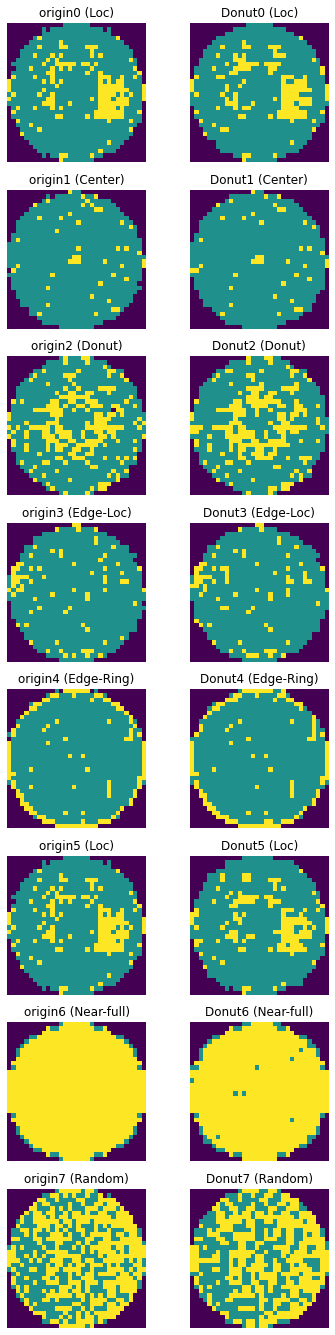

In [70]:
rows = len(faulty_case) - 1
cols = 2
n = rows*cols
fig, axes = plt.subplots(rows, cols, figsize=(cols*3, rows*3))

for row in range(rows):
  f = faulty_case[r]

  wafer = x_train_except_none[np.where(y_train_except_none==f)[0]][0]
  
  r = row
  ax = axes[r][0]
  ax.imshow(np.argmax(wafer, axis = -1))
  ax.set_title("origin" + str(row) + " (" + str(f) + ")")
  ax.axis('off')

  encoded_x = encoder.predict(wafer[np.newaxis])
  noised_encoded_x = encoded_x + np.random.normal(loc=0, scale=0.3, size = (1, int(width/2), int(width/2), 64))  # noise 강하게 줌

  ax2 = axes[r][1]
  ax2.imshow(np.argmax(decoder.predict(noised_encoded_x)[0], axis=-1))
  ax2.set_title(failureType_cols[col] + str(row) + " (" + str(f) + ")")
  ax2.axis('off')
plt.show()

In [71]:
# augment function define
def gen_data(wafer, label):
    # Encode input wafer
    encoded_x = encoder.predict(wafer)
    
    # dummy array for collecting noised wafer
    gen_x = np.zeros((1, width, width, 3))
    
    # Make wafer until total # of wafer of "none"
    for i in range((len(np.where(y_train == "none")[0])//len(wafer))):
      if i == (len(np.where(y_train == "none")[0])//len(wafer) - 1):
        remainder = len(np.where(y_train == "none")[0]) - len(gen_x) - len(wafer) + 1
        noised_encoded_x = encoded_x[:remainder] + np.random.normal(loc=0, scale=0.3, size = (remainder, int(width/2), int(width/2), 64))

      else:
        noised_encoded_x = encoded_x + np.random.normal(loc=0, scale=0.5, size = (len(encoded_x), int(width/2), int(width/2), 64)) 
      noised_gen_x = decoder.predict(noised_encoded_x)
      gen_x = np.concatenate((gen_x, noised_gen_x), axis=0)

    gen_y = np.full((len(gen_x), 1), label)
    return gen_x[1:], gen_y[1:]

In [72]:
# before augmentation
for f in faulty_case :
    print('{} : {}'.format(f, len(y_train[y_train==f])))

Center : 3006
Donut : 389
Edge-Loc : 3632
Edge-Ring : 6776
Loc : 2515
Near-full : 104
Random : 606
Scratch : 835
none : 7000


In [73]:
for f in faulty_case : 
    # skip none case
    if f == 'none' : 
        continue

    gen_x, gen_y = gen_data(x_train[np.where(y_train == f)[0]], f)
    x_train = np.concatenate((x_train, gen_x), axis=0)
    y_train = np.concatenate((y_train, gen_y))

In [74]:
print('After Generate new_x shape : {}, new_y shape : {}'.format(x_train.shape, y_train.shape))

After Generate new_x shape : (63000, 32, 32, 3), new_y shape : (63000, 1)


In [75]:
for f in faulty_case :
    print('{} : {}'.format(f, len(y_train[y_train==f])))

Center : 7000
Donut : 7000
Edge-Loc : 7000
Edge-Ring : 7000
Loc : 7000
Near-full : 7000
Random : 7000
Scratch : 7000
none : 7000


In [76]:
print("Test dataset")
for f in faulty_case :
    print('{} : {}'.format(f, len(y_test[y_test==f])))

Test dataset
Center : 1288
Donut : 166
Edge-Loc : 1557
Edge-Ring : 2904
Loc : 1078
Near-full : 45
Random : 260
Scratch : 358
none : 3000


In [77]:
from tensorflow.keras.utils import to_categorical
for i, l in enumerate(faulty_case):
    y_train[y_train==l] = i
    y_test[y_test==l] = i
    
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# 5. 모델 

In [78]:
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.2, shuffle=True, stratify=y_train, random_state=42)

In [79]:
from keras import backend as K

def recall(y_target, y_pred):
    # clip(t, clip_value_min, clip_value_max) : clip_value_min~clip_value_max 이외 가장자리를 깎아 낸다
    # round : 반올림한다
    y_target_yn = K.round(K.clip(y_target, 0, 1)) # 실제값을 0(Negative) 또는 1(Positive)로 설정한다
    y_pred_yn = K.round(K.clip(y_pred, 0, 1)) # 예측값을 0(Negative) 또는 1(Positive)로 설정한다

    # True Positive는 실제 값과 예측 값이 모두 1(Positive)인 경우이다
    count_true_positive = K.sum(y_target_yn * y_pred_yn) 

    # (True Positive + False Negative) = 실제 값이 1(Positive) 전체
    count_true_positive_false_negative = K.sum(y_target_yn)

    # Recall =  (True Positive) / (True Positive + False Negative)
    # K.epsilon()는 'divide by zero error' 예방차원에서 작은 수를 더한다
    recall = count_true_positive / (count_true_positive_false_negative + K.epsilon())

    # return a single tensor value
    return recall


def precision(y_target, y_pred):
    # clip(t, clip_value_min, clip_value_max) : clip_value_min~clip_value_max 이외 가장자리를 깎아 낸다
    # round : 반올림한다
    y_pred_yn = K.round(K.clip(y_pred, 0, 1)) # 예측값을 0(Negative) 또는 1(Positive)로 설정한다
    y_target_yn = K.round(K.clip(y_target, 0, 1)) # 실제값을 0(Negative) 또는 1(Positive)로 설정한다

    # True Positive는 실제 값과 예측 값이 모두 1(Positive)인 경우이다
    count_true_positive = K.sum(y_target_yn * y_pred_yn) 

    # (True Positive + False Positive) = 예측 값이 1(Positive) 전체
    count_true_positive_false_positive = K.sum(y_pred_yn)

    # Precision = (True Positive) / (True Positive + False Positive)
    # K.epsilon()는 'divide by zero error' 예방차원에서 작은 수를 더한다
    precision = count_true_positive / (count_true_positive_false_positive + K.epsilon())

    # return a single tensor value
    return precision


def f1score(y_target, y_pred):
    _recall = recall(y_target, y_pred)
    _precision = precision(y_target, y_pred)
    # K.epsilon()는 'divide by zero error' 예방차원에서 작은 수를 더한다
    _f1score = ( 2 * _recall * _precision) / (_recall + _precision+ K.epsilon())
    
    # return a single tensor value
    return _f1score

In [80]:
def CNN_Basic():
  input = keras.Input(shape = (width,width,3))
  y = keras.layers.Conv2D(32, kernel_size = (3,3), padding = 'same', activation = 'relu')(input)
  y = keras.layers.BatchNormalization()(y)
  y = keras.layers.MaxPool2D(pool_size = (2,2), padding = 'same')(y)
  y = keras.layers.Conv2D(64, kernel_size = (3,3), padding = 'same', activation = 'relu')(y)
  y = keras.layers.BatchNormalization()(y)
  y = keras.layers.MaxPool2D(pool_size = (2,2), padding = 'same')(y)
  y = keras.layers.Conv2D(128, kernel_size = (3,3), padding = 'same', activation = 'relu')(y)
  y = keras.layers.BatchNormalization()(y)
  y = keras.layers.MaxPool2D(pool_size = (2,2), padding = 'same')(y)
  y = keras.layers.Flatten()(y)
  y = keras.layers.Dense(256)(y)
  y = keras.layers.Dropout(0.5)(y)
  y = keras.layers.Dense(64)(y)
  y = keras.layers.Dropout(0.5)(y)
  y = keras.layers.Dense(9, activation = "softmax")(y)

  model = keras.Model(input, y)
  return model

model = CNN_Basic()

model.compile(optimizer='Adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy', f1score])
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 64)        256       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0   

In [81]:
hist = model.fit(x_train, y_train, batch_size = 64, validation_data = (x_valid,y_valid), epochs = 40, verbose =1)

Epoch 1/40
788/788 [==============================] - 138s 173ms/step - loss: 1.5900 - accuracy: 0.6882 - f1score: 0.6883 - val_loss: 0.7029 - val_accuracy: 0.7624 - val_f1score: 0.7767
Epoch 2/40
788/788 [==============================] - 136s 172ms/step - loss: 0.6094 - accuracy: 0.8122 - f1score: 0.8095 - val_loss: 0.5475 - val_accuracy: 0.8335 - val_f1score: 0.8305
Epoch 3/40
788/788 [==============================] - 135s 172ms/step - loss: 0.4725 - accuracy: 0.8470 - f1score: 0.8447 - val_loss: 0.4195 - val_accuracy: 0.8470 - val_f1score: 0.8455
Epoch 4/40
788/788 [==============================] - 135s 172ms/step - loss: 0.3997 - accuracy: 0.8678 - f1score: 0.8669 - val_loss: 0.6581 - val_accuracy: 0.7925 - val_f1score: 0.8058
Epoch 5/40
788/788 [==============================] - 135s 172ms/step - loss: 0.3346 - accuracy: 0.8865 - f1score: 0.8854 - val_loss: 0.3666 - val_accuracy: 0.8689 - val_f1score: 0.8684
Epoch 6/40
788/788 [==============================] - 136s 172ms/step 

KeyboardInterrupt: ignored

NameError: ignored

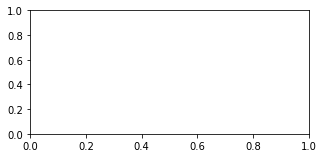

In [85]:
fig = plt.figure()

ax1 = fig.add_subplot(2, 1, 1)
ax1.plot(hist.history['accuracy'])
ax1.plot(hist.history['val_accuracy'])
ax1.title('Accuracy')
ax1.legend(['accuracy', 'val_accuracy'])

ax1 = fig.add_subplot(2, 1, 2)
ax1.plot(hist.history['loss'])
ax1.plot(hist.history['val_loss'])
ax1.title('loss')
ax1.legend(['loss', 'val_loss'])

plt.show()

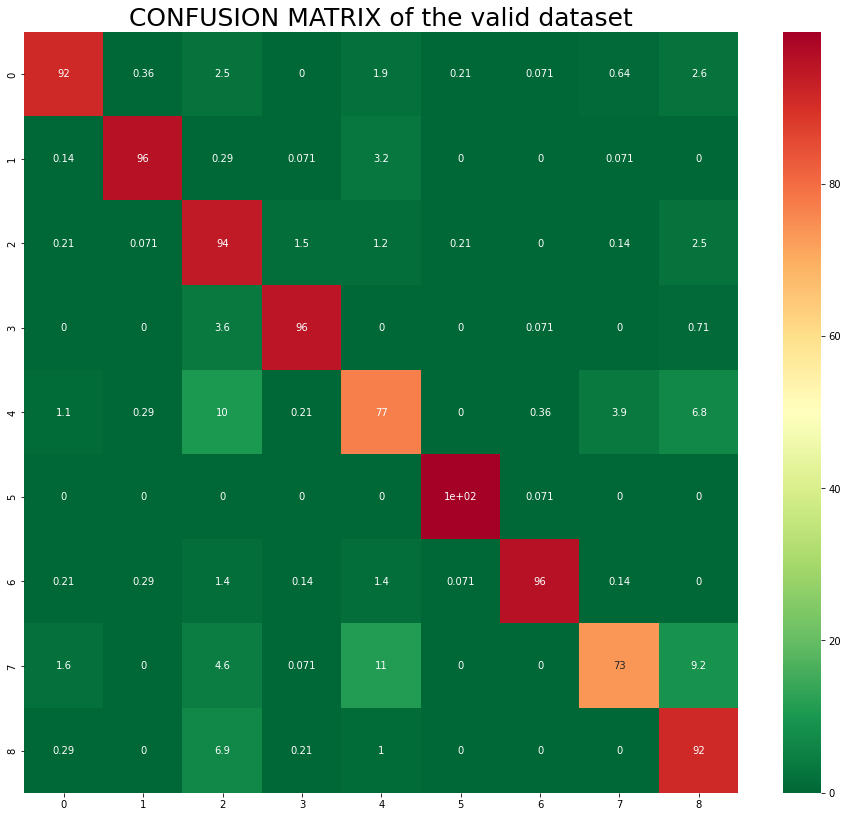

In [95]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_true = y_valid
y_pred = model.predict(x_valid)
plt.figure(figsize=(16,14))
sns.heatmap(confusion_matrix(y_true.argmax(axis=1), 
                             y_pred.argmax(axis=1), 
                             normalize = 'true')*100, annot = True, cmap='RdYlGn_r')
plt.title("CONFUSION MATRIX of the valid dataset", fontsize=25)
plt.show()

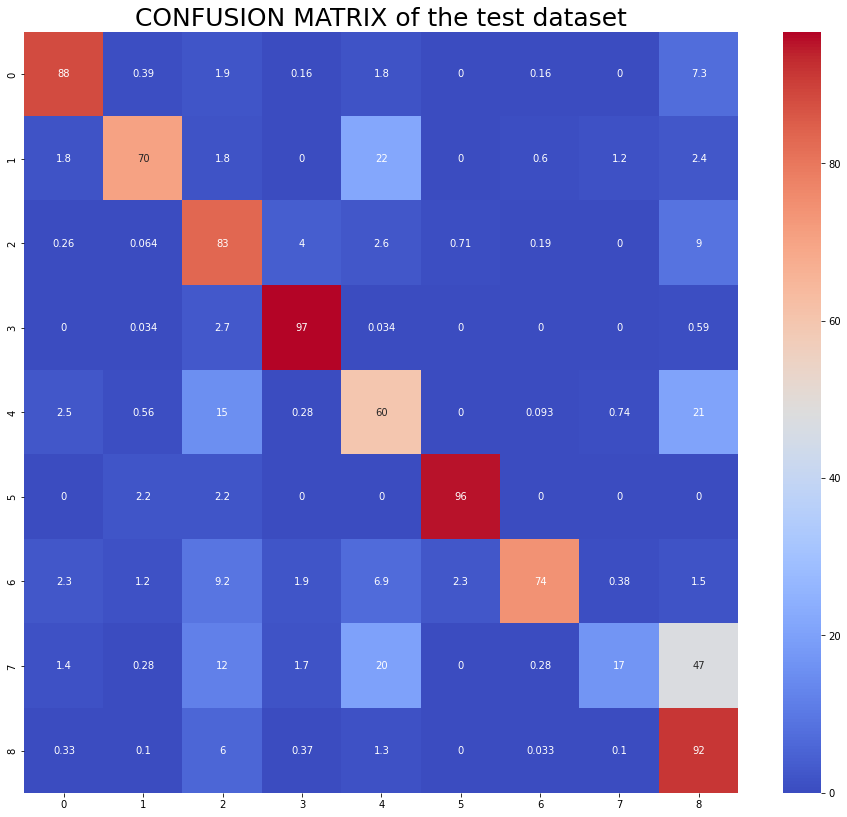

In [96]:
y_true = y_test
y_pred = model.predict(x_test)
plt.figure(figsize=(16,14))
sns.heatmap(confusion_matrix(y_true.argmax(axis=1),
                             y_pred.argmax(axis=1), 
                             normalize = 'true')*100, annot = True, cmap='coolwarm')
plt.title("CONFUSION MATRIX of the test dataset", fontsize=25)
plt.show()

In [98]:
from sklearn.metrics import f1_score
f1_score(y_true.argmax(axis=1), y_pred.argmax(axis=1), average = None)
# MUCH BETTER THAN THE BASELINE MODEL
# MORE AUGMENTED, MORE OVERFITTED!!!

array([0.91693548, 0.76973684, 0.76840855, 0.96794209, 0.6605317 ,
       0.81904762, 0.83549784, 0.27777778, 0.85928471])

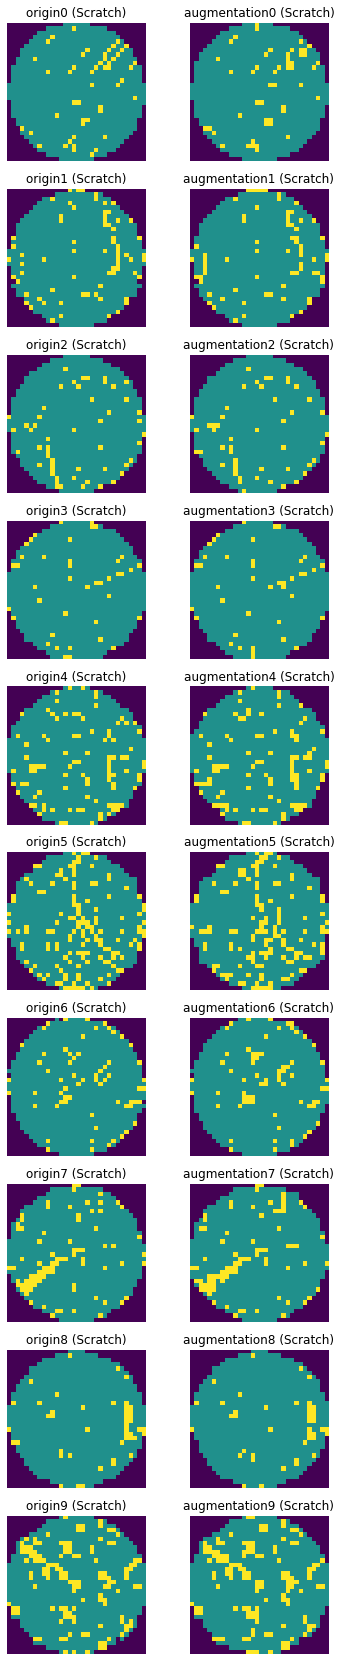

In [117]:
rows = 10
cols = 2
n = rows*cols
fig, axes = plt.subplots(rows, cols, figsize=(cols*3, rows*3))

for row in range(rows):
  wafer = x_train_except_none[np.where(y_train_except_none=="Scratch")[0]][row]
  
  r = row
  ax = axes[r][0]
  ax.imshow(np.argmax(wafer, axis = -1))
  ax.set_title("origin" + str(row) + " (Scratch)")
  ax.axis('off')

  encoded_x = encoder.predict(wafer[np.newaxis])
  noised_encoded_x = encoded_x + np.random.normal(loc=0, scale=0.3, size = (1, int(width/2), int(width/2), 64))  # noise 강하게 줌

  ax2 = axes[r][1]
  ax2.imshow(np.argmax(decoder.predict(noised_encoded_x)[0], axis=-1))
  ax2.set_title("augmentation" + str(row) + " (Scratch)")
  ax2.axis('off')
plt.show()

### 원본 데이터 VS Augmentation 데이터

In [108]:
# split data train, test
x_train_, x_test_, y_train_, y_test_ = train_test_split(new_x, y,
                                                    test_size=0.3,
                                                    stratify=y, random_state=42)

In [109]:
from tensorflow.keras.utils import to_categorical
for i, l in enumerate(faulty_case):
    y_train_[y_train_==l] = i
    y_test_[y_test_==l] = i
    
y_train_ = to_categorical(y_train_)
y_test_ = to_categorical(y_test_)

In [110]:
x_train_, x_valid_, y_train_, y_valid_ = train_test_split(x_train_, y_train_, test_size=0.2, shuffle=True, stratify=y_train_, random_state=42)

In [111]:
model2 = CNN_Basic()

model2.compile(optimizer='Adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy', f1score])

In [112]:
hist = model2.fit(x_train_, y_train_, batch_size = 64, validation_data = (x_valid_, y_valid_), epochs = 40, verbose =1)

Epoch 1/40
311/311 [==============================] - 55s 173ms/step - loss: 3.1065 - accuracy: 0.6383 - f1score: 0.6394 - val_loss: 6.8434 - val_accuracy: 0.3819 - val_f1score: 0.3822
Epoch 2/40
311/311 [==============================] - 53s 172ms/step - loss: 1.1984 - accuracy: 0.7477 - f1score: 0.7493 - val_loss: 0.5381 - val_accuracy: 0.8407 - val_f1score: 0.8408
Epoch 3/40
311/311 [==============================] - 53s 172ms/step - loss: 0.7821 - accuracy: 0.7955 - f1score: 0.7956 - val_loss: 0.4786 - val_accuracy: 0.8397 - val_f1score: 0.8446
Epoch 4/40
311/311 [==============================] - 53s 172ms/step - loss: 0.6077 - accuracy: 0.8230 - f1score: 0.8246 - val_loss: 0.4296 - val_accuracy: 0.8598 - val_f1score: 0.8610
Epoch 5/40
311/311 [==============================] - 53s 172ms/step - loss: 0.5017 - accuracy: 0.8482 - f1score: 0.8498 - val_loss: 0.4106 - val_accuracy: 0.8586 - val_f1score: 0.8602
Epoch 6/40
311/311 [==============================] - 54s 172ms/step - loss

KeyboardInterrupt: ignored

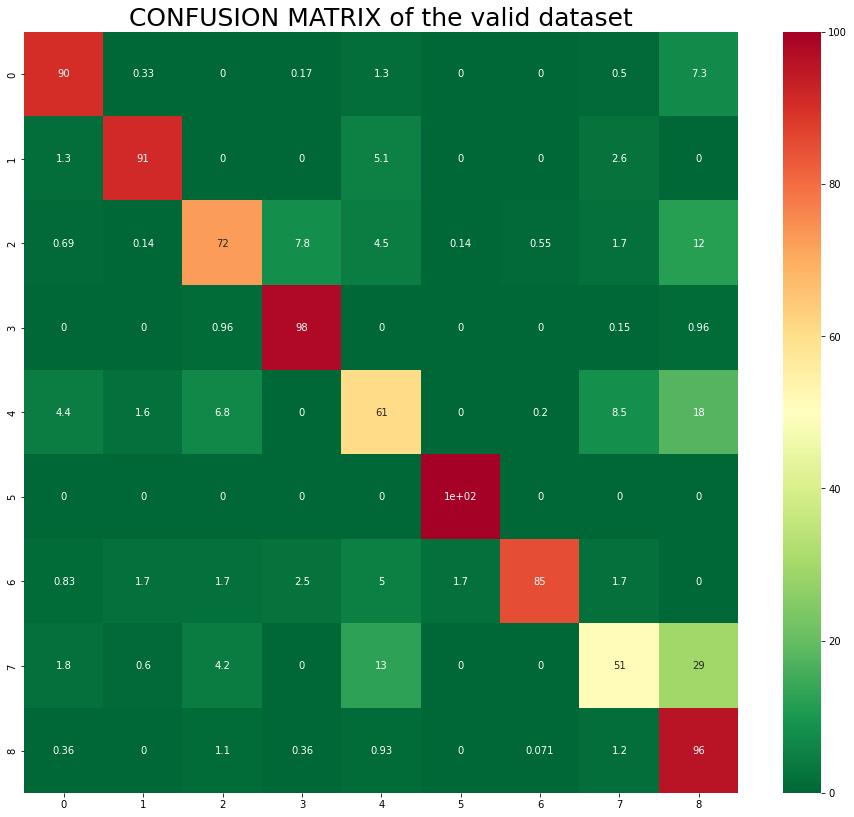

In [114]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_true = y_valid_
y_pred = model2.predict(x_valid_)
plt.figure(figsize=(16,14))
sns.heatmap(confusion_matrix(y_true.argmax(axis=1), 
                             y_pred.argmax(axis=1), 
                             normalize = 'true')*100, annot = True, cmap='RdYlGn_r')
plt.title("CONFUSION MATRIX of the valid dataset", fontsize=25)
plt.show()

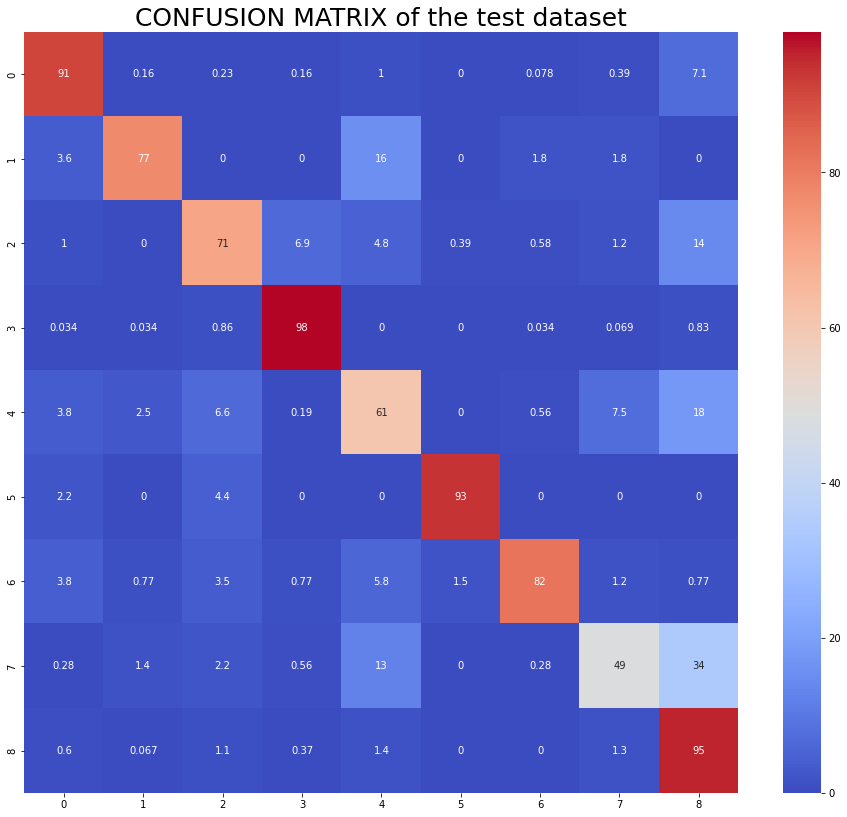

In [115]:
y_true = y_test_
y_pred = model2.predict(x_test_)
plt.figure(figsize=(16,14))
sns.heatmap(confusion_matrix(y_true.argmax(axis=1),
                             y_pred.argmax(axis=1), 
                             normalize = 'true')*100, annot = True, cmap='coolwarm')
plt.title("CONFUSION MATRIX of the test dataset", fontsize=25)
plt.show()